In [1]:
import xgboost

In [2]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [3]:
current_path = os.getcwd()
file = '\\datasets\\credit_card_data\\credit_card.csv'
data = pd.read_csv(current_path  + file)

In [4]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
data.columns
data['Class'].sum()

492

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


有些機器學習演算法沒辦法處理非數字值和空缺值。

In [7]:
nanCounter = np.isnan(data).sum()
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

創建一個標準化過後的特徵矩陣X，並且把標籤的欄位獨立出來Y(內涵1為詐騙0為非詐騙)

重塑我們的特徵矩陣，標準化。

In [9]:
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()
featuresToScale = dataX.drop(['Time'],axis=1).columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

In [10]:
dataX

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.0,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,1.0,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,1.0,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,2.0,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,172787.0,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,172788.0,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,172788.0,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [11]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-7.894416e-16,2.647157e-17,-4.302564e-15,-6.662098e-16,-2.586322e-16,4.147497e-16,-8.820879e-16,-2.466016e-16,3.102531e-16,...,2.589559e-16,1.869947e-17,1.494373e-15,-6.977058e-16,1.151050e-16,-7.959207e-16,3.444180e-16,-2.454881e-18,5.251749e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


### 特徵工程
特徵工程包含建立新的特徵，舉例來說，計算原本特徵的比例或式數量或是總和，來幫助我們機器學習演算法可以提煉出更強烈的訊號。

特徵選擇包含選格特徵的子集合來做訓練，更有效的移除相對不重要的特徵，有可能預防學習過程遇到過度擬和資料集的雜訊。

在這信用卡詐騙的資料集中，我們沒有原本特正，只有從PCA提煉出來的重點元素，因為不知道有那些特徵被表現出來，因此無法使用智慧特徵工程。

特徵選擇也不被適用因為我們觀察到有284807個數包含著30個特徵，這大大的減少過度擬合的機會。 

利用皮爾森相關係數，看的出來每個特徵彼此之間的相關性並不高。代表這之間沒有冗餘的特徵。

如果有冗餘的特徵，我們可以透過降維移除或是減少這些冗餘。 這個資料集以敬使用過PCA降維了

In [12]:
correlationMatrix = pd.DataFrame(data=[], index = dataX.columns, columns = dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [13]:
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.0,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.23
V2,-0.01,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.53
V3,-0.42,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.21
V4,-0.11,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.1
V5,0.17,0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.39
V6,-0.06,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.22
V7,0.08,0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.4
V8,-0.04,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.1
V9,-0.01,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,1.0,...,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.04


### 資料視覺化
最後一個步驟

因為沒有太多的詐騙個案可以被學習，這問一變成很難解答。
幸運的是在資料集中已經有上標籤了。

Text(0, 0.5, 'Frequency Percentage')

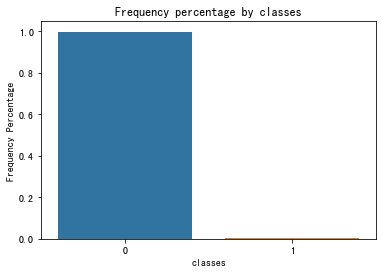

In [14]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
count_classes
ax = sns.barplot(x = count_classes.index, y = count_classes/len(data))
ax.set_title('Frequency percentage by classes')
ax.set_xlabel('classes')
ax.set_ylabel('Frequency Percentage')

### Model preparation
現在資料都準備好了，開始建模。
我們需要把資料分割成訓練集和測試集，選擇cost函數，準備k-fold 交叉驗證集。
### 分割訓練測試
未被看過資料的表現稱之為泛化誤差，評比模型好壞的重要指標之一。


In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.33, random_state=2018, stratify = dataY)
print(X_test)
X_train

            Time        V1        V2        V3        V4        V5        V6  \
67353    52490.0  0.600923 -0.971676  0.077752 -0.889221 -1.099568 -0.260433   
67626    52625.0 -1.706842 -2.645103  0.971504 -1.579282  0.183585 -0.114004   
169699  119814.0  0.037158  0.986021 -0.074758  1.874219  1.351438  0.245319   
217315  140847.0  0.031532 -2.156211 -0.849943  1.627775 -1.133397  0.570112   
111420   72223.0 -0.720946  0.646959  1.144389  0.044563 -0.720564  0.648495   
...          ...       ...       ...       ...       ...       ...       ...   
70762    54006.0  0.599940  0.044816  0.318567  0.328286 -0.240749 -0.167651   
69843    53607.0 -3.218504 -7.556344 -2.946907  2.093479 -3.066424  0.114460   
191806  129415.0  0.315826  0.476230 -1.762871  0.014607  2.228548  2.724557   
259722  159245.0  1.024601 -0.242565 -0.337631  0.242971 -0.280451 -0.012501   
36616    38618.0  0.541473 -0.409014  0.389062 -1.218127 -0.263921  0.909760   

              V7        V8        V9  .

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
142087,84575.0,-1.011878,1.170867,0.201381,-0.252129,-0.386390,-0.049420,-0.192587,0.932578,-0.220587,...,0.238737,-0.233631,-0.783226,0.157078,-0.586703,-0.161425,0.230941,0.525280,0.473651,-0.297296
165168,117245.0,0.072173,0.665164,-0.241837,-0.380205,0.699456,-0.634194,0.838470,-0.137344,-0.167262,...,0.098082,-0.446548,-1.039925,0.148460,1.079003,-0.761713,0.220597,0.564453,0.262996,-0.337757
235908,148591.0,0.099579,-0.389819,-0.944884,-1.492064,-0.090536,-0.879539,1.260059,-0.577069,-2.758547,...,0.135386,0.615087,2.051663,0.537784,1.887247,-0.950002,0.194730,0.394588,0.814038,0.499962
148255,89630.0,0.015623,0.520260,0.191791,-0.418058,0.320155,-0.775673,0.821509,-0.159150,-0.060892,...,-0.039324,-0.342336,-0.740217,0.130539,-0.027853,-0.956686,0.296304,0.619910,0.294929,-0.329281
145672,87121.0,0.009169,0.524802,0.173686,-0.334556,0.766454,0.505087,0.267757,0.189101,-0.186534,...,0.107825,-0.201647,-0.456069,0.049791,-0.727602,-2.183860,-0.148240,0.585847,0.762249,-0.333279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,35743.0,-0.249496,0.101075,0.909879,-0.688839,-0.389697,-0.969098,0.404471,-0.295909,-1.322352,...,0.115211,0.369245,1.209182,-0.066533,1.627214,0.628748,-0.301789,-0.110189,0.057551,-0.241283
195475,131077.0,-0.254091,-2.756705,-2.082848,0.720192,-0.770847,0.043816,1.347183,-0.309383,0.281819,...,3.172416,1.379262,-0.221650,-1.822138,0.611275,-0.865244,1.296414,-0.902976,0.455664,5.005845
48687,43742.0,0.106034,-1.131050,-0.470366,0.156445,-0.553642,-0.376423,0.654146,-0.283678,0.204805,...,1.498658,0.098597,-1.586216,-0.825029,-0.620769,0.109427,1.733472,-0.501687,0.300189,2.041624
159608,112716.0,0.055698,0.496830,-0.098914,-0.582971,0.647489,-0.393782,0.810516,-0.116346,0.031466,...,0.002229,-0.444765,-1.058758,-0.074376,-1.672445,-0.672678,0.420560,0.603711,0.263881,-0.320925


訓練集有190280個實例(67%原始資料集)，測試集有93987實例。
為了保留訓練集和測試集中的詐騙比率約在0.17%，我們使用statify參數。
為了更簡單的重現結果，設定randomstate=2018
測試集會用來評估模型的泛化誤差

### Cost function
訓練之前，需要定義成本函數，機器學習學習訓練集的過程中會試著最小化成本函數的值。

因為這個是監督式分類問題，含有兩個類別，我們使用二元分類log loss函數。會去交叉計算模型預測和真實標籤的值。


模型會產生針對每個信用卡交易產生一組詐騙機率，機率越靠近真實標籤，log loss 函數的值就越低。機器學習會試著最小化這個值。

### 創建k-fold cross-validation set
幫助模型評估測試集的表現，將訓練集分割成訓練和驗證集。


舉例來說，如果將訓練集分成五等分，4/5等分為新的訓練集，剩下第五等份拿來評估模型的預測。




In [16]:
k_fold = StratifiedKFold(n_splits=5, shuffle = True, random_state =2018)
k_fold

StratifiedKFold(n_splits=5, random_state=2018, shuffle=True)

## ML models (part 1)

### Model1 : Logistic Regression

In [17]:
penalty = 'l2'
c = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs =1
logReg = LogisticRegression(penalty=penalty, C=c,class_weight=class_weight,
                           random_state=random_state, solver=solver,n_jobs=n_jobs)

我們把penalty設成默認值L2而非L1，L2比L1對於異常離群值沒那麼敏感，L2會指派非零權重給最近的特徵，會有一個相較穩定的答案。
L1會指派高權重給最重要的特徵剩下的都指派為接近零權重，本質上是在演算法訓練的過程中做特徵選擇。不過，因為特徵之間的權重太過多樣化，L1相較L2不穩定

C 是正則化的強度，正則化利用懲處複雜性解決過度擬和。正則化的強度越強，懲處的代價就越高。正則化將機器學習演算法推向更青睞簡易的模型。
C 一定要是正浮點數，數字越小強度越大。

我們的信用卡交易資料集非常的不平衡。284807個案中僅僅有492是詐欺個案。訓練過程中，我們希望演算法可以專注在真正被標籤的交易，也就是詐欺個案，因為資料集中的實例太稀少了。

邏輯回歸模型，設定class_weight平衡，讓演算法知道我們有不平衡族群問題。演算法訓練過程需要給予正的標籤更大的權重。在這案例，權重和族權比例會成反比，演算法賦予少數正標籤更高的權重，賦予多數的副標籤更低的權重。

而random_state設定2018，幫助讀者重現結果。


### 訓練模型
現在 超參數都已經設定完成，準備訓練五個k-fold cross-validation芬個完的邏輯回規模型

In [18]:
trainingScores = []
cvScores=[]
predictionBasedOnKFolds = pd.DataFrame(data=[], index = y_train.index, columns=[0,1])
model = logReg

for train_index,cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    model.fit(X_train_fold, y_train_fold)
    print('X_train_fold\n',X_train_fold,'\n')
    
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
#     print(loglossTraining)
    trainingScores.append(loglossTraining)
    
    predictionBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionBasedOnKFolds.loc[X_cv_fold.index, 1 ])
    cvScores.append(loglossCV)
    
    print('Training LOG LOSS: ', loglossTraining)
    print('CV log loss: ',loglossCV)
    

    
loglossLogisticRegression = log_loss(y_train, predictionBasedOnKFolds.loc[:,1])
print('Logistic Regression log loss: ',loglossLogisticRegression)
print('predictionBasedOnKFolds: ',predictionBasedOnKFolds)



X_train_fold
             Time        V1        V2        V3        V4        V5        V6  \
142087   84575.0 -1.011878  1.170867  0.201381 -0.252129 -0.386390 -0.049420   
235908  148591.0  0.099579 -0.389819 -0.944884 -1.492064 -0.090536 -0.879539   
148255   89630.0  0.015623  0.520260  0.191791 -0.418058  0.320155 -0.775673   
277038  167426.0  0.955991 -0.196574 -0.067870  0.415055 -0.625323 -0.716068   
135075   81096.0 -0.561821 -0.272869  0.971386 -1.738369 -0.467218 -0.083286   
...          ...       ...       ...       ...       ...       ...       ...   
30023    35743.0 -0.249496  0.101075  0.909879 -0.688839 -0.389697 -0.969098   
195475  131077.0 -0.254091 -2.756705 -2.082848  0.720192 -0.770847  0.043816   
48687    43742.0  0.106034 -1.131050 -0.470366  0.156445 -0.553642 -0.376423   
159608  112716.0  0.055698  0.496830 -0.098914 -0.582971  0.647489 -0.393782   
197673  132124.0 -0.377027  0.314696 -2.094645 -3.273754  1.733317  1.665912   

              V7        V

X_train_fold
             Time        V1        V2        V3        V4        V5        V6  \
165168  117245.0  0.072173  0.665164 -0.241837 -0.380205  0.699456 -0.634194   
235908  148591.0  0.099579 -0.389819 -0.944884 -1.492064 -0.090536 -0.879539   
148255   89630.0  0.015623  0.520260  0.191791 -0.418058  0.320155 -0.775673   
145672   87121.0  0.009169  0.524802  0.173686 -0.334556  0.766454  0.505087   
277038  167426.0  0.955991 -0.196574 -0.067870  0.415055 -0.625323 -0.716068   
...          ...       ...       ...       ...       ...       ...       ...   
246836  153347.0 -0.546156  0.339465 -0.187865 -0.308010  0.304747 -0.954182   
195475  131077.0 -0.254091 -2.756705 -2.082848  0.720192 -0.770847  0.043816   
48687    43742.0  0.106034 -1.131050 -0.470366  0.156445 -0.553642 -0.376423   
159608  112716.0  0.055698  0.496830 -0.098914 -0.582971  0.647489 -0.393782   
197673  132124.0 -0.377027  0.314696 -2.094645 -3.273754  1.733317  1.665912   

              V7        V

## 評估結果

(通常)訓練的log loss會比cv log loss還要低
因為機器學習演算法直接從訓練集中學習，值得注意的是交叉驗證集中有明確從訓練中取出的交易

這五個批次執行，訓練和交叉驗證的log loss很相似。邏輯回規模形沒有產生嚴重的過度擬和。如果真的有，訓練集的log loss會遠低於交叉驗證集的log loss。

因為我們把預測完的結果存在五個不同的集合中，可以結合這些預測結果到同一集合中。單一集合會和原本的測試集一樣，現在可以開始計算整個訓練集最終的log loss

Logistic Regression log loss:  0.10910875388145211

## 評估指標
雖然log loss 是個不錯評估模型表現的方式，依舊還是想要有個更直覺的方式去了解結論。 舉例來說，如何找到訓練集中的詐騙交易，稱之為Recall。

### 混淆矩陣
true positives, true negatives, false positives, and false negatives 
以信用卡詐騙舉例，如果預測到所有的交易都不是詐騙的話，284315 true negatives, 492 false negatives, 0 true positives, 0 false positives，我們得到0%準確率在辨認真實詐騙交易。
處理不平衡族群問題中，混淆矩陣在捕捉這種次優結果效果不彰。

針對更平衡的族群問題(true positive的數量和true negatives大略相同)混淆矩陣的效果會還不錯。

### Precision-Recall Curve
可處理不平衡資料的問題，
Precision是true positives數量除上所有positive情況數量
precision越高代表正確率越高

recall是 true positives 除上所有positives數量

當recall很高precision很低時，代表捕捉到很多positive案同時有很多錯誤警告。也就是標籤了許多詐騙個案但是多數都並非真的是詐騙。

很明顯兩種解決方案都有重大的問題。在高precision低recall的案子中，信用卡公司會因為詐騙損失重大，但不會出現非必要拒絕交易而激怒客戶
另外一個低precisionel高recall的案子中，會捕捉到許多的詐騙個案，但大多數其實都是正常的交易。

最優的解決方案是高precision高recall的時候，只拒絕真正是詐騙交易，可以不捉到大部分的案子。

但不可能會是完美，最優化解取決於threshold，threshold高的時候比較少的案子會被預測成positive，最後會形成高precision低recall。反之。

在我們信用卡的交易紀錄資料集中，把threshold想像成模型拒絕交易的敏感度，threshold高會拒絕少數交易，但一旦他拒絕的會有很大的機會是詐騙案。

在precision和recall中遊走會形成一個曲線圖。評估這個取線圖，根據不同的threshold計算出計算加權平均精度，精度越高結果越好。

threshold的選擇很重要，通常會是由決策者決定。資料科學家展示precesion-recall曲線圖。

依照我們信用卡詐騙交易資料集，最重要的問題是我們如何利用詐騙偵測平衡客戶的使用經驗(避免拒絕正常交易)
這個問題若沒有真實歷史數據是沒辦法被回答的，但我們從模型中可以找出最佳的precision-recall曲線圖。再找出適當的threshold。

### ROC Receiver Operating Characteristic
ROC 曲線圖繪畫出true positive rate在y軸，x軸畫false positive rate。
true positive rate可以比擬成敏感度，false positive rate可以當作是單一特異性。曲線越靠近左上角預測結果越好，(0.0,1.0)為絕對優化點，意味著0% false positive rate, 100% true positive rate

評估效果: 計算曲線底下的面積，面積越大，效果越好。

#### 評估邏輯回規模型
了解了評估指標，來使用他們評估我們的邏輯回歸模型

preds:
        truelabel prediction
142087          0   0.000829
165168          0   0.031959
235908          0   0.160952
148255          0   0.006908
145672          0   0.037343
...           ...        ...
30023           0   0.251544
195475          0   0.039432
48687           0   0.018585
159608          0    0.00473
197673          0   0.000307

[190820 rows x 2 columns] 

average_precision:
0.7349719047073503 



Text(0.5, 1.0, 'precision-recall curve : average precision = 0.73')

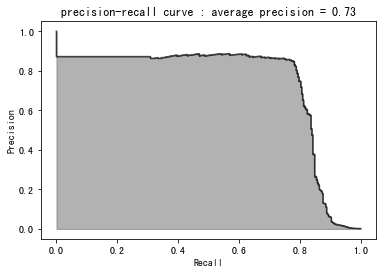

In [19]:
preds = pd.concat([y_train, predictionBasedOnKFolds.loc[:,1]],axis =1)
preds.columns = ['truelabel', 'prediction']
print('preds:\n{} \n'.format(preds))
predictionBasesOnKFoldsLogisticRegression = preds.copy()

precision, recall, threshold = precision_recall_curve(preds['truelabel'],preds['prediction'])

average_precision = average_precision_score(preds['truelabel'],preds['prediction'])
print('average_precision:\n{} \n'.format(average_precision))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post',alpha=0.3,color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision-recall curve : average precision = {0:0.2f}'.format(average_precision))

看圖顯示，我們大約達到80% recall(抓到80%的詐騙交易)，70% 的precision(模型標籤的詐騙交易有70%是真的詐騙，30%抓錯)

我們可以計算平均精度 提煉成單一數字，也就是0.73

試著用auROC


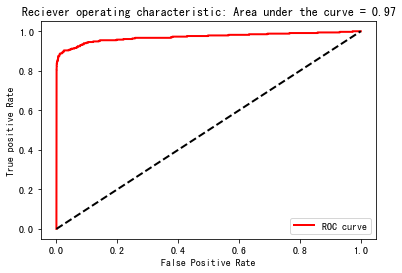

In [20]:
fpr, tpr, threshold = roc_curve(preds['truelabel'],preds['prediction'])

areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr,color='r', lw=2, label='ROC curve')
plt.plot([0,1], [0,1],color='k', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Reciever operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc='lower right')
plt.show()

auROC曲線分數是0.97，這個指標也可以決定有多少詐騙交易有被抓到，目前還不知道0.97是好還是壞

## ML models (part2)
要和邏輯回規模型比較，

### model2 隨機森林
和邏輯回歸一樣，我們會設定超參數，訓練模型，使用PR曲線和ROC曲線評估模型。

設定超參數

In [21]:
n_estimators =10
max_features ='auto'
max_depth = None
min_samples_split=2
min_samples_leaf =1
min_weight_fraction_leaf = 0.0
max_leaf_nodes =None
bootstrap = True
oob_score =False
n_jobs =-1
random_state = 2018
class_weight ='balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators,
                            max_features=max_features,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            min_weight_fraction_leaf=min_weight_fraction_leaf,
                            max_leaf_nodes=max_leaf_nodes,
                            bootstrap=bootstrap,
                            oob_score=oob_score,
                            n_jobs=n_jobs,
                            random_state=random_state,
                            class_weight=class_weight)


估計的數量設定為10，會創建10棵樹，會平均這10棵樹來產生結果。
每棵樹會考慮特徵總數的平方根(在這裡有30個特徵，也就是會選擇5特徵無條件捨去)

設定max_depth，樹會無限生長下去，依據特徵的子集合盡可能地切割。
class_weight 給定平衡，因為資料集屬於不平衡的。


#### 訓練
先執行k-fold 交叉驗證五次，訓練4/5的訓練資料，在第五個片段做預測

In [22]:
trainingScores = []
cvScores =[]
predictionBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index, columns=[0,1])
model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
#     print('train_index',len(train_index))
#     print('cv_index',len(cv_index))
#     print(len(cv_index)+len(train_index))
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
#     print('predict_proba',model.predict_proba(X_train_fold)[:,0].sum())
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
    
    trainingScores.append(loglossTraining)
    
    predictionBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)
    
    loglossCV = log_loss(y_cv_fold, predictionBasedOnKFolds.loc[X_cv_fold.index,1])
    
    cvScores.append(loglossCV)
    
    print('Training log loss: ', loglossTraining)
    print('CV log loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, predictionBasedOnKFolds.loc[:,1])

print('Random Forests log loss: ',loglossRandomForestsClassifier)

Training log loss:  0.0004570758747246713
CV log loss:  0.009090797476425144
Training log loss:  0.0004101805310493279
CV log loss:  0.012640234648018377
Training log loss:  0.00040027341363592047
CV log loss:  0.009990776910341356
Training log loss:  0.0003894650263288808
CV log loss:  0.006620007375395402
Training log loss:  0.0004291016183715201
CV log loss:  0.01348243171548044
Random Forests log loss:  0.010364849625132141


可以看到 訓練的log loss低於交叉驗證集的log loss，可以推測出在設定默認超參數的時候，有一點過度擬和。

利用交叉驗證的預測，整個訓練集
Random Forests log loss:  0.010364849625132141

雖然訓練資料有過度擬和的現象，隨機森林的驗證log loss是邏輯回歸模型的十分之一，有大大的改善。 表示隨機森林模型使用在信用卡詐騙交易資料集正確標籤上比較優越。


average_precision:
0.7891826802227376 



Text(0.5, 1.0, 'precision-recall curve : average precision = 0.79')

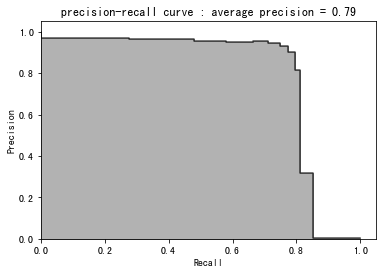

In [23]:
preds = pd.concat([y_train, predictionBasedOnKFolds.loc[:,1]],axis =1)
preds.columns = ['truelabel', 'prediction']
# print('preds:\n{} \n'.format(preds))
predictionBasesOnKFoldsRandomForest = preds.copy()

precision, recall, threshold = precision_recall_curve(preds['truelabel'],preds['prediction'])

average_precision = average_precision_score(preds['truelabel'],preds['prediction'])
print('average_precision:\n{} \n'.format(average_precision))
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post',alpha=0.3,color='k')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision-recall curve : average precision = {0:0.2f}'.format(average_precision))

Text(0, 0.5, 'True positice rate')

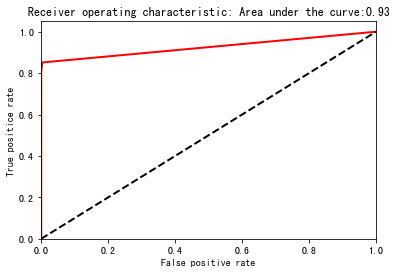

In [24]:
fpr, tpr, threshold = roc_curve(preds['truelabel'],preds['prediction'])

areaUnderROC = auc(fpr,tpr)

plt.title('Receiver operating characteristic: Area under the curve:{0:.2f}'.format(areaUnderROC))
plt.plot(fpr,tpr,color='r',lw=2)
plt.plot([0,1],[0,1],color='k',lw=2,linestyle='--')
plt.xlim([0,1.0])
plt.ylim([0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positice rate')

## Model 3 : XGBoost

現在使用梯度提升來訓練和評估結果

#### 設定超參數
我們把這問題設定成二元分類問題，利用log loss當過成本函數。
設定每顆樹最大深度，默認學習率為0.3。
針對每一棵樹，使用所有觀察和特徵。


In [25]:
params_xGB = {
    'nthread':16,
    'learning_rate': 0.3,
    'gamma':0,
    'max_depth':6,
    'min_child_weight':1,
    'max_delta_step':0,
    'subsample':1.0,
    'colsample_bytree':1.0,
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
#     'silent':1
}


#### 訓練模型
和之前一樣，使用k-fold 交叉驗證。
每一次執行，梯度提升模型會訓練最多2000回合，評估交叉驗證的log loss是否會下降。 如果交叉驗證的log loss停止增加(200回合)，訓練的過程又會停止以免過度擬和。

In [31]:
trainingScores = []
cvScores =[]
predictionBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0,1])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data = X_train_fold, label = y_train_fold)
    
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round = 2000, nfold=5, early_stopping_rounds=200, verbose_eval=50)
#     print(bst)
    
    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = bst.predict(dCV)
    
    loglossCV = log_loss(y_cv_fold, predictionBasedOnKFolds.loc[X_cv_fold.index, 'prediction'])
    
    cvScores.append(loglossCV)
    
    print('training log loss: ', loglossTraining)
    print('CV log loss: ', loglossCV)

training log loss:  0.0009698748099943061
CV log loss:  0.0023983441021552983
training log loss:  0.0008723517218764318
CV log loss:  0.003118963021269461
training log loss:  0.000712335835070419
CV log loss:  0.002299779731193732
training log loss:  0.0009144685886465914
CV log loss:  0.0026294304116430732
training log loss:  0.0005772056207278208
CV log loss:  0.003686224309307126


In [32]:
loglossXGBoostGradientBoosting = log_loss(y_train, predictionBasedOnKFolds.loc[:,'prediction'])
print('xgboosting gradient boosting log loss: ',loglossXGBoostGradientBoosting)

xgboosting gradient boosting log loss:  0.002826548315113739


#### 評估結果
所有訓練集的log loss(利用交叉驗證預測)結果，是隨機森林的1/5，邏輯回歸的1/15，大大的改善log loss。

畫一下PR-curve

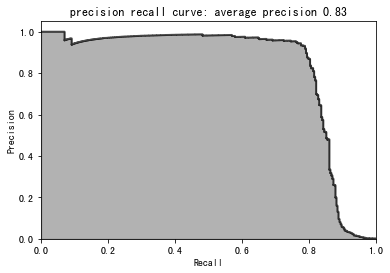

In [55]:
preds = pd.concat([y_train,predictionBasedOnKFolds.loc[:,'prediction']],axis=1)
preds.columns=['truelabel','prediction']

predkfoldxgb = preds.copy()

precision, recall, threshold= precision_recall_curve(preds['truelabel'],preds['prediction'])

average_precision = average_precision_score(preds['truelabel'],preds['prediction'])
plt.title('precision recall curve: average precision {0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.step(recall,precision,lw=2,color='k',alpha=0.7,where='post')
plt.fill_between(recall,precision,color='k',alpha=0.3,step='post')

平均的精度是0.82，隨機森林是0.79，邏輯回歸是0.73。


(0.0, 1.05)

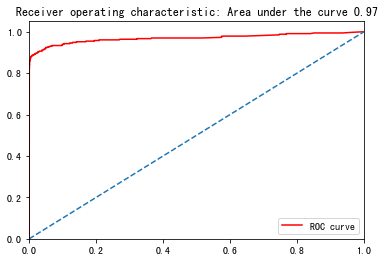

In [67]:
fpr, tpr, threshold = roc_curve(preds['truelabel'],preds['prediction'])

AreaRoc= auc(fpr,tpr)

plt.title('Receiver operating characteristic: Area under the curve {0:.2f}'.format(AreaRoc))
plt.plot(fpr,tpr,color='r',label='ROC curve')
plt.plot([0,1],[0,1],linestyle='--')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1.05])


由上圖可以看出auROC曲線是0.97，和邏輯回歸0.97一樣，比隨機森林0.93好一點。 看下來XGBoost是三個中最好的。

#### Model 4 Gradient Boosting Machine( LightGBM)
設定超參數

一樣設定為二元分類的問題

log loss為成本函數

max depth每棵樹最深為4

learning rate = 0.1

每棵樹我們用所有的案例和所有的特徵。每棵樹默認的葉子數是31。


In [174]:
params_lightGB ={
    'task':'train',
    'application':'binary',
    'num_class':1,
    'boosting':'gbdt',
    'objective':'binary',
    'metric':'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves':31,
    'learning_rate':0.01,
    'feature_fraction':1.0,
    'bagging_fraction':1.0,
    'bagging_freq':0,
    'bagging_seed':2018,
    'verbose':-1,
    'num_threads':16
}

#### 訓練模型

verbose=0 會有warning

```
No further splits with positive gain, best gain: -inf
```
將verbose=-1即可



In [175]:
trainScores=[]
cvScores=[]
predictionBasedOnKfolds = pd.DataFrame(data=[], index= y_train.index, columns=['prediction'])

for train_index,cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:],X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold,y_train_fold)
    
    lgb_eval = lgb.Dataset(X_cv_fold,y_cv_fold, reference = lgb_train)
    
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000, valid_sets = lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, gbm.predict(X_train_fold, num_iteration = gbm.best_iteration))
    
    trainingScores.append(loglossTraining)
    
    predictionBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration)
    
    loglossCV = log_loss(y_cv_fold,predictionBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    
    cvScores.append(loglossCV)
    
    print('Training log loss: ', loglossTraining)
    print('CV log loss: ', loglossCV)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[1]	valid_0's binary_logloss: 0.00634115
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00627113
[3]	valid_0's binary_logloss: 0.00620105
[4]	valid_0's binary_logloss: 0.00615078
[5]	valid_0's binary_logloss: 0.00609437
[6]	valid_0's binary_logloss: 0.00605299
[7]	valid_0's binary_logloss: 0.00599903
[8]	valid_0's binary_logloss: 0.00594246
[9]	valid_0's binary_logloss: 0.00588891
[10]	valid_0's binary_logloss: 0.0058368
[11]	valid_0's binary_logloss: 0.00578315
[12]	valid_0's binary_logloss: 0.00573411
[13]	valid_0's binary_logloss: 0.0056854
[14]	valid_0's binary_logloss: 0.0056367
[15]	valid_0's binary_logloss: 0.0055896
[16]	valid_0's binary_logloss: 0.00554671
[17]	valid_0's binary_logloss: 0.00550416
[18]	valid_0's binary_logloss: 0.00546486
[19]	valid_0's binary_logloss: 0.00542391
[20]	valid_0's binary_logloss: 0.005384

[197]	valid_0's binary_logloss: 0.00305955
[198]	valid_0's binary_logloss: 0.00305578
[199]	valid_0's binary_logloss: 0.00305267
[200]	valid_0's binary_logloss: 0.00304912
[201]	valid_0's binary_logloss: 0.00304598
[202]	valid_0's binary_logloss: 0.00304359
[203]	valid_0's binary_logloss: 0.00303904
[204]	valid_0's binary_logloss: 0.00303634
[205]	valid_0's binary_logloss: 0.00303206
[206]	valid_0's binary_logloss: 0.0030284
[207]	valid_0's binary_logloss: 0.00302612
[208]	valid_0's binary_logloss: 0.00302187
[209]	valid_0's binary_logloss: 0.00301932
[210]	valid_0's binary_logloss: 0.0030171
[211]	valid_0's binary_logloss: 0.00301496
[212]	valid_0's binary_logloss: 0.00301082
[213]	valid_0's binary_logloss: 0.00300827
[214]	valid_0's binary_logloss: 0.00300651
[215]	valid_0's binary_logloss: 0.00300231
[216]	valid_0's binary_logloss: 0.0029998
[217]	valid_0's binary_logloss: 0.00299842
[218]	valid_0's binary_logloss: 0.00299647
[219]	valid_0's binary_logloss: 0.002994
[220]	valid_0's 

[394]	valid_0's binary_logloss: 0.00276646
[395]	valid_0's binary_logloss: 0.00276572
[396]	valid_0's binary_logloss: 0.00276584
[397]	valid_0's binary_logloss: 0.00276533
[398]	valid_0's binary_logloss: 0.00276511
[399]	valid_0's binary_logloss: 0.00276501
[400]	valid_0's binary_logloss: 0.00276258
[401]	valid_0's binary_logloss: 0.00276194
[402]	valid_0's binary_logloss: 0.00276088
[403]	valid_0's binary_logloss: 0.00276001
[404]	valid_0's binary_logloss: 0.00275979
[405]	valid_0's binary_logloss: 0.00275914
[406]	valid_0's binary_logloss: 0.00275897
[407]	valid_0's binary_logloss: 0.0027576
[408]	valid_0's binary_logloss: 0.00275782
[409]	valid_0's binary_logloss: 0.00275719
[410]	valid_0's binary_logloss: 0.002757
[411]	valid_0's binary_logloss: 0.00275792
[412]	valid_0's binary_logloss: 0.00275721
[413]	valid_0's binary_logloss: 0.00275599
[414]	valid_0's binary_logloss: 0.00275496
[415]	valid_0's binary_logloss: 0.00275541
[416]	valid_0's binary_logloss: 0.00275495
[417]	valid_0'

[590]	valid_0's binary_logloss: 0.00268819
[591]	valid_0's binary_logloss: 0.00268757
[592]	valid_0's binary_logloss: 0.00268746
[593]	valid_0's binary_logloss: 0.0026872
[594]	valid_0's binary_logloss: 0.00268754
[595]	valid_0's binary_logloss: 0.00268713
[596]	valid_0's binary_logloss: 0.00268682
[597]	valid_0's binary_logloss: 0.00268659
[598]	valid_0's binary_logloss: 0.00268635
[599]	valid_0's binary_logloss: 0.00268618
[600]	valid_0's binary_logloss: 0.00268631
[601]	valid_0's binary_logloss: 0.00268537
[602]	valid_0's binary_logloss: 0.00268577
[603]	valid_0's binary_logloss: 0.00268519
[604]	valid_0's binary_logloss: 0.00268619
[605]	valid_0's binary_logloss: 0.0026861
[606]	valid_0's binary_logloss: 0.00268642
[607]	valid_0's binary_logloss: 0.00268584
[608]	valid_0's binary_logloss: 0.00268625
[609]	valid_0's binary_logloss: 0.00268614
[610]	valid_0's binary_logloss: 0.0026863
[611]	valid_0's binary_logloss: 0.00268566
[612]	valid_0's binary_logloss: 0.00268542
[613]	valid_0'

[798]	valid_0's binary_logloss: 0.0026537
[799]	valid_0's binary_logloss: 0.00265317
[800]	valid_0's binary_logloss: 0.00265363
[801]	valid_0's binary_logloss: 0.0026527
[802]	valid_0's binary_logloss: 0.002653
[803]	valid_0's binary_logloss: 0.00265241
[804]	valid_0's binary_logloss: 0.00265271
[805]	valid_0's binary_logloss: 0.00265307
[806]	valid_0's binary_logloss: 0.00265296
[807]	valid_0's binary_logloss: 0.00265228
[808]	valid_0's binary_logloss: 0.00265026
[809]	valid_0's binary_logloss: 0.00265072
[810]	valid_0's binary_logloss: 0.00265205
[811]	valid_0's binary_logloss: 0.00265171
[812]	valid_0's binary_logloss: 0.00265142
[813]	valid_0's binary_logloss: 0.00265113
[814]	valid_0's binary_logloss: 0.00265106
[815]	valid_0's binary_logloss: 0.00265068
[816]	valid_0's binary_logloss: 0.00265049
[817]	valid_0's binary_logloss: 0.00264946
[818]	valid_0's binary_logloss: 0.00264899
[819]	valid_0's binary_logloss: 0.00264925
[820]	valid_0's binary_logloss: 0.00264859
[821]	valid_0's

[996]	valid_0's binary_logloss: 0.00263561
[997]	valid_0's binary_logloss: 0.00263426
[998]	valid_0's binary_logloss: 0.00263484
[999]	valid_0's binary_logloss: 0.00263454
[1000]	valid_0's binary_logloss: 0.00263482
[1001]	valid_0's binary_logloss: 0.00263519
[1002]	valid_0's binary_logloss: 0.00263529
[1003]	valid_0's binary_logloss: 0.002635
[1004]	valid_0's binary_logloss: 0.00263478
[1005]	valid_0's binary_logloss: 0.00263508
[1006]	valid_0's binary_logloss: 0.00263412
[1007]	valid_0's binary_logloss: 0.00263416
[1008]	valid_0's binary_logloss: 0.0026339
[1009]	valid_0's binary_logloss: 0.00263497
[1010]	valid_0's binary_logloss: 0.00263506
[1011]	valid_0's binary_logloss: 0.00263539
[1012]	valid_0's binary_logloss: 0.00263537
[1013]	valid_0's binary_logloss: 0.0026347
[1014]	valid_0's binary_logloss: 0.00263538
[1015]	valid_0's binary_logloss: 0.00263578
[1016]	valid_0's binary_logloss: 0.00263568
[1017]	valid_0's binary_logloss: 0.00263691
[1018]	valid_0's binary_logloss: 0.00263

[1199]	valid_0's binary_logloss: 0.00263981
[1200]	valid_0's binary_logloss: 0.00263824
[1201]	valid_0's binary_logloss: 0.00263862
[1202]	valid_0's binary_logloss: 0.00263899
[1203]	valid_0's binary_logloss: 0.00264068
[1204]	valid_0's binary_logloss: 0.00264215
[1205]	valid_0's binary_logloss: 0.00264236
[1206]	valid_0's binary_logloss: 0.00264225
[1207]	valid_0's binary_logloss: 0.00264185
[1208]	valid_0's binary_logloss: 0.00264263
[1209]	valid_0's binary_logloss: 0.00264314
[1210]	valid_0's binary_logloss: 0.0026433
[1211]	valid_0's binary_logloss: 0.00264204
[1212]	valid_0's binary_logloss: 0.00264194
[1213]	valid_0's binary_logloss: 0.00264219
[1214]	valid_0's binary_logloss: 0.00264187
[1215]	valid_0's binary_logloss: 0.00264225
[1216]	valid_0's binary_logloss: 0.00264223
[1217]	valid_0's binary_logloss: 0.00264134
[1218]	valid_0's binary_logloss: 0.00264174
[1219]	valid_0's binary_logloss: 0.00264222
[1220]	valid_0's binary_logloss: 0.00264263
[1221]	valid_0's binary_logloss: 

[42]	valid_0's binary_logloss: 0.00480371
[43]	valid_0's binary_logloss: 0.00477901
[44]	valid_0's binary_logloss: 0.00475083
[45]	valid_0's binary_logloss: 0.00472512
[46]	valid_0's binary_logloss: 0.00469657
[47]	valid_0's binary_logloss: 0.00467032
[48]	valid_0's binary_logloss: 0.00464618
[49]	valid_0's binary_logloss: 0.00462088
[50]	valid_0's binary_logloss: 0.00459344
[51]	valid_0's binary_logloss: 0.00456539
[52]	valid_0's binary_logloss: 0.00454264
[53]	valid_0's binary_logloss: 0.00451774
[54]	valid_0's binary_logloss: 0.00449302
[55]	valid_0's binary_logloss: 0.00447298
[56]	valid_0's binary_logloss: 0.00445147
[57]	valid_0's binary_logloss: 0.00442654
[58]	valid_0's binary_logloss: 0.00440614
[59]	valid_0's binary_logloss: 0.00438558
[60]	valid_0's binary_logloss: 0.0043643
[61]	valid_0's binary_logloss: 0.00434658
[62]	valid_0's binary_logloss: 0.00432865
[63]	valid_0's binary_logloss: 0.00431193
[64]	valid_0's binary_logloss: 0.00429222
[65]	valid_0's binary_logloss: 0.00

[260]	valid_0's binary_logloss: 0.00307183
[261]	valid_0's binary_logloss: 0.00307006
[262]	valid_0's binary_logloss: 0.00306916
[263]	valid_0's binary_logloss: 0.0030677
[264]	valid_0's binary_logloss: 0.00306647
[265]	valid_0's binary_logloss: 0.00306398
[266]	valid_0's binary_logloss: 0.00306246
[267]	valid_0's binary_logloss: 0.00306077
[268]	valid_0's binary_logloss: 0.00305952
[269]	valid_0's binary_logloss: 0.00305805
[270]	valid_0's binary_logloss: 0.00305703
[271]	valid_0's binary_logloss: 0.0030559
[272]	valid_0's binary_logloss: 0.00305442
[273]	valid_0's binary_logloss: 0.00305346
[274]	valid_0's binary_logloss: 0.0030523
[275]	valid_0's binary_logloss: 0.00305155
[276]	valid_0's binary_logloss: 0.0030505
[277]	valid_0's binary_logloss: 0.0030494
[278]	valid_0's binary_logloss: 0.00304857
[279]	valid_0's binary_logloss: 0.00304721
[280]	valid_0's binary_logloss: 0.00304631
[281]	valid_0's binary_logloss: 0.00304536
[282]	valid_0's binary_logloss: 0.00304441
[283]	valid_0's 

[474]	valid_0's binary_logloss: 0.00295918
[475]	valid_0's binary_logloss: 0.00296013
[476]	valid_0's binary_logloss: 0.00295922
[477]	valid_0's binary_logloss: 0.00295974
[478]	valid_0's binary_logloss: 0.00296094
[479]	valid_0's binary_logloss: 0.00295797
[480]	valid_0's binary_logloss: 0.00295778
[481]	valid_0's binary_logloss: 0.00295876
[482]	valid_0's binary_logloss: 0.00295585
[483]	valid_0's binary_logloss: 0.00295538
[484]	valid_0's binary_logloss: 0.0029549
[485]	valid_0's binary_logloss: 0.00295586
[486]	valid_0's binary_logloss: 0.00295452
[487]	valid_0's binary_logloss: 0.00295576
[488]	valid_0's binary_logloss: 0.00295445
[489]	valid_0's binary_logloss: 0.00295481
[490]	valid_0's binary_logloss: 0.00295615
[491]	valid_0's binary_logloss: 0.00295585
[492]	valid_0's binary_logloss: 0.00295607
[493]	valid_0's binary_logloss: 0.00295519
[494]	valid_0's binary_logloss: 0.00295566
[495]	valid_0's binary_logloss: 0.00295663
[496]	valid_0's binary_logloss: 0.00295644
[497]	valid_

[669]	valid_0's binary_logloss: 0.00292676
[670]	valid_0's binary_logloss: 0.00292651
[671]	valid_0's binary_logloss: 0.00292552
[672]	valid_0's binary_logloss: 0.00292546
[673]	valid_0's binary_logloss: 0.00292484
[674]	valid_0's binary_logloss: 0.00292479
[675]	valid_0's binary_logloss: 0.0029248
[676]	valid_0's binary_logloss: 0.00292498
[677]	valid_0's binary_logloss: 0.00292479
[678]	valid_0's binary_logloss: 0.00292592
[679]	valid_0's binary_logloss: 0.00292547
[680]	valid_0's binary_logloss: 0.00292541
[681]	valid_0's binary_logloss: 0.00292596
[682]	valid_0's binary_logloss: 0.00292495
[683]	valid_0's binary_logloss: 0.00292609
[684]	valid_0's binary_logloss: 0.00292639
[685]	valid_0's binary_logloss: 0.00292572
[686]	valid_0's binary_logloss: 0.0029264
[687]	valid_0's binary_logloss: 0.00292686
[688]	valid_0's binary_logloss: 0.00292678
[689]	valid_0's binary_logloss: 0.00292837
[690]	valid_0's binary_logloss: 0.00292811
[691]	valid_0's binary_logloss: 0.00292863
[692]	valid_0

Training log loss:  0.0005045248399375337
CV log loss:  0.002924791746192262
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[1]	valid_0's binary_logloss: 0.00598384
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00591434
[3]	valid_0's binary_logloss: 0.00583836
[4]	valid_0's binary_logloss: 0.005768
[5]	valid_0's binary_logloss: 0.00569818
[6]	valid_0's binary_logloss: 0.00561621
[7]	valid_0's binary_logloss: 0.00554444
[8]	valid_0's binary_logloss: 0.00547904
[9]	valid_0's binary_logloss: 0.00539964
[10]	valid_0's binary_logloss: 0.00534096
[11]	valid_0's binary_logloss: 0.00528728
[12]	valid_0's binary_logloss: 0.0052319
[13]	valid_0's binary_logloss: 0.00518247
[14]	valid_0's binary_logloss: 0.00513405
[15]	valid_0's binary_logloss: 0.00508548
[16]	valid_0's binary_logloss: 0.00503678
[17]	valid_0's binary_logloss: 0.00498865
[18]	valid_0's binary_logloss: 0.00494693
[19

[212]	valid_0's binary_logloss: 0.00251235
[213]	valid_0's binary_logloss: 0.00251116
[214]	valid_0's binary_logloss: 0.0025085
[215]	valid_0's binary_logloss: 0.00250501
[216]	valid_0's binary_logloss: 0.00250406
[217]	valid_0's binary_logloss: 0.00250094
[218]	valid_0's binary_logloss: 0.00249771
[219]	valid_0's binary_logloss: 0.0024953
[220]	valid_0's binary_logloss: 0.00249347
[221]	valid_0's binary_logloss: 0.00249048
[222]	valid_0's binary_logloss: 0.00248732
[223]	valid_0's binary_logloss: 0.00248544
[224]	valid_0's binary_logloss: 0.00248301
[225]	valid_0's binary_logloss: 0.00248135
[226]	valid_0's binary_logloss: 0.0024791
[227]	valid_0's binary_logloss: 0.00247708
[228]	valid_0's binary_logloss: 0.00247477
[229]	valid_0's binary_logloss: 0.00247324
[230]	valid_0's binary_logloss: 0.00247126
[231]	valid_0's binary_logloss: 0.00246915
[232]	valid_0's binary_logloss: 0.00246709
[233]	valid_0's binary_logloss: 0.00246494
[234]	valid_0's binary_logloss: 0.00246283
[235]	valid_0'

[425]	valid_0's binary_logloss: 0.00231222
[426]	valid_0's binary_logloss: 0.00231202
[427]	valid_0's binary_logloss: 0.00231134
[428]	valid_0's binary_logloss: 0.00231106
[429]	valid_0's binary_logloss: 0.00231039
[430]	valid_0's binary_logloss: 0.00230969
[431]	valid_0's binary_logloss: 0.00230991
[432]	valid_0's binary_logloss: 0.00230915
[433]	valid_0's binary_logloss: 0.00230849
[434]	valid_0's binary_logloss: 0.00230824
[435]	valid_0's binary_logloss: 0.00230814
[436]	valid_0's binary_logloss: 0.00230824
[437]	valid_0's binary_logloss: 0.0023072
[438]	valid_0's binary_logloss: 0.00230658
[439]	valid_0's binary_logloss: 0.00230609
[440]	valid_0's binary_logloss: 0.00230585
[441]	valid_0's binary_logloss: 0.0023051
[442]	valid_0's binary_logloss: 0.002305
[443]	valid_0's binary_logloss: 0.00230477
[444]	valid_0's binary_logloss: 0.00230463
[445]	valid_0's binary_logloss: 0.00230313
[446]	valid_0's binary_logloss: 0.00230252
[447]	valid_0's binary_logloss: 0.00230196
[448]	valid_0's

[650]	valid_0's binary_logloss: 0.00223715
[651]	valid_0's binary_logloss: 0.00223711
[652]	valid_0's binary_logloss: 0.00223756
[653]	valid_0's binary_logloss: 0.0022366
[654]	valid_0's binary_logloss: 0.00223554
[655]	valid_0's binary_logloss: 0.00223601
[656]	valid_0's binary_logloss: 0.00223585
[657]	valid_0's binary_logloss: 0.0022356
[658]	valid_0's binary_logloss: 0.00223612
[659]	valid_0's binary_logloss: 0.00223612
[660]	valid_0's binary_logloss: 0.0022362
[661]	valid_0's binary_logloss: 0.00223651
[662]	valid_0's binary_logloss: 0.0022371
[663]	valid_0's binary_logloss: 0.00223828
[664]	valid_0's binary_logloss: 0.00223844
[665]	valid_0's binary_logloss: 0.00223844
[666]	valid_0's binary_logloss: 0.00223789
[667]	valid_0's binary_logloss: 0.00223874
[668]	valid_0's binary_logloss: 0.00223879
[669]	valid_0's binary_logloss: 0.00223897
[670]	valid_0's binary_logloss: 0.00223911
[671]	valid_0's binary_logloss: 0.00223913
[672]	valid_0's binary_logloss: 0.00223817
[673]	valid_0's

[866]	valid_0's binary_logloss: 0.00223878
[867]	valid_0's binary_logloss: 0.00223833
[868]	valid_0's binary_logloss: 0.00223889
[869]	valid_0's binary_logloss: 0.00223784
[870]	valid_0's binary_logloss: 0.00223818
[871]	valid_0's binary_logloss: 0.00223778
[872]	valid_0's binary_logloss: 0.00223774
[873]	valid_0's binary_logloss: 0.00223849
[874]	valid_0's binary_logloss: 0.00223818
[875]	valid_0's binary_logloss: 0.00223855
[876]	valid_0's binary_logloss: 0.00223782
[877]	valid_0's binary_logloss: 0.00223793
[878]	valid_0's binary_logloss: 0.00223863
[879]	valid_0's binary_logloss: 0.00223809
[880]	valid_0's binary_logloss: 0.00223807
[881]	valid_0's binary_logloss: 0.00223805
[882]	valid_0's binary_logloss: 0.00223832
[883]	valid_0's binary_logloss: 0.00223752
[884]	valid_0's binary_logloss: 0.00223788
[885]	valid_0's binary_logloss: 0.00223762
[886]	valid_0's binary_logloss: 0.00223797
[887]	valid_0's binary_logloss: 0.00223814
[888]	valid_0's binary_logloss: 0.00223837
[889]	valid

[114]	valid_0's binary_logloss: 0.00342549
[115]	valid_0's binary_logloss: 0.00341654
[116]	valid_0's binary_logloss: 0.00340846
[117]	valid_0's binary_logloss: 0.00340061
[118]	valid_0's binary_logloss: 0.00339282
[119]	valid_0's binary_logloss: 0.00338401
[120]	valid_0's binary_logloss: 0.00337667
[121]	valid_0's binary_logloss: 0.00336927
[122]	valid_0's binary_logloss: 0.00336105
[123]	valid_0's binary_logloss: 0.00335392
[124]	valid_0's binary_logloss: 0.00334723
[125]	valid_0's binary_logloss: 0.00333867
[126]	valid_0's binary_logloss: 0.00333172
[127]	valid_0's binary_logloss: 0.00332398
[128]	valid_0's binary_logloss: 0.00331634
[129]	valid_0's binary_logloss: 0.0033098
[130]	valid_0's binary_logloss: 0.00330459
[131]	valid_0's binary_logloss: 0.00329828
[132]	valid_0's binary_logloss: 0.0032915
[133]	valid_0's binary_logloss: 0.00328441
[134]	valid_0's binary_logloss: 0.00327803
[135]	valid_0's binary_logloss: 0.00327184
[136]	valid_0's binary_logloss: 0.00326459
[137]	valid_0

[322]	valid_0's binary_logloss: 0.00274191
[323]	valid_0's binary_logloss: 0.00274014
[324]	valid_0's binary_logloss: 0.00273928
[325]	valid_0's binary_logloss: 0.00273843
[326]	valid_0's binary_logloss: 0.00273725
[327]	valid_0's binary_logloss: 0.0027356
[328]	valid_0's binary_logloss: 0.0027353
[329]	valid_0's binary_logloss: 0.00273494
[330]	valid_0's binary_logloss: 0.00273444
[331]	valid_0's binary_logloss: 0.00273372
[332]	valid_0's binary_logloss: 0.00273177
[333]	valid_0's binary_logloss: 0.00273084
[334]	valid_0's binary_logloss: 0.00273094
[335]	valid_0's binary_logloss: 0.00272924
[336]	valid_0's binary_logloss: 0.00272844
[337]	valid_0's binary_logloss: 0.00272706
[338]	valid_0's binary_logloss: 0.00272516
[339]	valid_0's binary_logloss: 0.00272487
[340]	valid_0's binary_logloss: 0.00272325
[341]	valid_0's binary_logloss: 0.00272247
[342]	valid_0's binary_logloss: 0.00272164
[343]	valid_0's binary_logloss: 0.00271982
[344]	valid_0's binary_logloss: 0.00271914
[345]	valid_0

[525]	valid_0's binary_logloss: 0.00267553
[526]	valid_0's binary_logloss: 0.0026754
[527]	valid_0's binary_logloss: 0.00267371
[528]	valid_0's binary_logloss: 0.002674
[529]	valid_0's binary_logloss: 0.00267283
[530]	valid_0's binary_logloss: 0.00267262
[531]	valid_0's binary_logloss: 0.00267267
[532]	valid_0's binary_logloss: 0.00267238
[533]	valid_0's binary_logloss: 0.00267255
[534]	valid_0's binary_logloss: 0.00267273
[535]	valid_0's binary_logloss: 0.00267207
[536]	valid_0's binary_logloss: 0.00267212
[537]	valid_0's binary_logloss: 0.00267173
[538]	valid_0's binary_logloss: 0.00267147
[539]	valid_0's binary_logloss: 0.00267152
[540]	valid_0's binary_logloss: 0.00267128
[541]	valid_0's binary_logloss: 0.00267142
[542]	valid_0's binary_logloss: 0.00267172
[543]	valid_0's binary_logloss: 0.00267207
[544]	valid_0's binary_logloss: 0.00267197
[545]	valid_0's binary_logloss: 0.00267217
[546]	valid_0's binary_logloss: 0.00267236
[547]	valid_0's binary_logloss: 0.00267247
[548]	valid_0'

[738]	valid_0's binary_logloss: 0.00265567
[739]	valid_0's binary_logloss: 0.00265559
[740]	valid_0's binary_logloss: 0.00265586
[741]	valid_0's binary_logloss: 0.00265513
[742]	valid_0's binary_logloss: 0.0026556
[743]	valid_0's binary_logloss: 0.00265575
[744]	valid_0's binary_logloss: 0.0026559
[745]	valid_0's binary_logloss: 0.00265653
[746]	valid_0's binary_logloss: 0.00265727
[747]	valid_0's binary_logloss: 0.00265804
[748]	valid_0's binary_logloss: 0.00265849
[749]	valid_0's binary_logloss: 0.00265861
[750]	valid_0's binary_logloss: 0.00265771
[751]	valid_0's binary_logloss: 0.00265694
[752]	valid_0's binary_logloss: 0.00265776
[753]	valid_0's binary_logloss: 0.00265812
[754]	valid_0's binary_logloss: 0.00265737
[755]	valid_0's binary_logloss: 0.00265814
[756]	valid_0's binary_logloss: 0.00265773
[757]	valid_0's binary_logloss: 0.00265785
[758]	valid_0's binary_logloss: 0.00265842
[759]	valid_0's binary_logloss: 0.00265871
[760]	valid_0's binary_logloss: 0.0026583
[761]	valid_0'

[947]	valid_0's binary_logloss: 0.00267567
[948]	valid_0's binary_logloss: 0.00267675
[949]	valid_0's binary_logloss: 0.00267668
[950]	valid_0's binary_logloss: 0.00267676
[951]	valid_0's binary_logloss: 0.00267697
[952]	valid_0's binary_logloss: 0.00267716
[953]	valid_0's binary_logloss: 0.00267744
[954]	valid_0's binary_logloss: 0.00267701
[955]	valid_0's binary_logloss: 0.00267672
[956]	valid_0's binary_logloss: 0.00267647
[957]	valid_0's binary_logloss: 0.00267702
[958]	valid_0's binary_logloss: 0.00267694
[959]	valid_0's binary_logloss: 0.00267672
[960]	valid_0's binary_logloss: 0.00267696
[961]	valid_0's binary_logloss: 0.00267734
[962]	valid_0's binary_logloss: 0.00267706
[963]	valid_0's binary_logloss: 0.00267729
[964]	valid_0's binary_logloss: 0.00267721
[965]	valid_0's binary_logloss: 0.00267862
[966]	valid_0's binary_logloss: 0.00267968
[967]	valid_0's binary_logloss: 0.00267963
[968]	valid_0's binary_logloss: 0.00268047
[969]	valid_0's binary_logloss: 0.00268071
[970]	valid

[122]	valid_0's binary_logloss: 0.00415545
[123]	valid_0's binary_logloss: 0.00414903
[124]	valid_0's binary_logloss: 0.00414238
[125]	valid_0's binary_logloss: 0.00413453
[126]	valid_0's binary_logloss: 0.00412731
[127]	valid_0's binary_logloss: 0.00412143
[128]	valid_0's binary_logloss: 0.00411526
[129]	valid_0's binary_logloss: 0.00411021
[130]	valid_0's binary_logloss: 0.00410588
[131]	valid_0's binary_logloss: 0.00409935
[132]	valid_0's binary_logloss: 0.00409363
[133]	valid_0's binary_logloss: 0.0040879
[134]	valid_0's binary_logloss: 0.00408061
[135]	valid_0's binary_logloss: 0.00407531
[136]	valid_0's binary_logloss: 0.00407019
[137]	valid_0's binary_logloss: 0.00406466
[138]	valid_0's binary_logloss: 0.00405943
[139]	valid_0's binary_logloss: 0.00405407
[140]	valid_0's binary_logloss: 0.004049
[141]	valid_0's binary_logloss: 0.00404369
[142]	valid_0's binary_logloss: 0.00403931
[143]	valid_0's binary_logloss: 0.00403354
[144]	valid_0's binary_logloss: 0.00402901
[145]	valid_0'

[342]	valid_0's binary_logloss: 0.00366091
[343]	valid_0's binary_logloss: 0.00366073
[344]	valid_0's binary_logloss: 0.00366036
[345]	valid_0's binary_logloss: 0.00366033
[346]	valid_0's binary_logloss: 0.00366065
[347]	valid_0's binary_logloss: 0.00366036
[348]	valid_0's binary_logloss: 0.00366006
[349]	valid_0's binary_logloss: 0.00365934
[350]	valid_0's binary_logloss: 0.00365899
[351]	valid_0's binary_logloss: 0.00365866
[352]	valid_0's binary_logloss: 0.00365844
[353]	valid_0's binary_logloss: 0.00365836
[354]	valid_0's binary_logloss: 0.00365872
[355]	valid_0's binary_logloss: 0.00365805
[356]	valid_0's binary_logloss: 0.00365816
[357]	valid_0's binary_logloss: 0.0036581
[358]	valid_0's binary_logloss: 0.00365715
[359]	valid_0's binary_logloss: 0.0036573
[360]	valid_0's binary_logloss: 0.00365699
[361]	valid_0's binary_logloss: 0.003657
[362]	valid_0's binary_logloss: 0.00365586
[363]	valid_0's binary_logloss: 0.00365481
[364]	valid_0's binary_logloss: 0.00365482
[365]	valid_0's

[552]	valid_0's binary_logloss: 0.00360772
[553]	valid_0's binary_logloss: 0.00360753
[554]	valid_0's binary_logloss: 0.00360641
[555]	valid_0's binary_logloss: 0.00360649
[556]	valid_0's binary_logloss: 0.00360646
[557]	valid_0's binary_logloss: 0.00360647
[558]	valid_0's binary_logloss: 0.00360526
[559]	valid_0's binary_logloss: 0.00360506
[560]	valid_0's binary_logloss: 0.00360498
[561]	valid_0's binary_logloss: 0.00360529
[562]	valid_0's binary_logloss: 0.00360521
[563]	valid_0's binary_logloss: 0.00360534
[564]	valid_0's binary_logloss: 0.00360524
[565]	valid_0's binary_logloss: 0.00360542
[566]	valid_0's binary_logloss: 0.00360443
[567]	valid_0's binary_logloss: 0.00360447
[568]	valid_0's binary_logloss: 0.00360439
[569]	valid_0's binary_logloss: 0.00360467
[570]	valid_0's binary_logloss: 0.00360486
[571]	valid_0's binary_logloss: 0.00360479
[572]	valid_0's binary_logloss: 0.00360483
[573]	valid_0's binary_logloss: 0.00360477
[574]	valid_0's binary_logloss: 0.00360495
[575]	valid

[749]	valid_0's binary_logloss: 0.00361916
[750]	valid_0's binary_logloss: 0.00361961
[751]	valid_0's binary_logloss: 0.00361888
[752]	valid_0's binary_logloss: 0.00361912
[753]	valid_0's binary_logloss: 0.00361988
[754]	valid_0's binary_logloss: 0.00362048
[755]	valid_0's binary_logloss: 0.0036207
[756]	valid_0's binary_logloss: 0.00362015
[757]	valid_0's binary_logloss: 0.00362095
[758]	valid_0's binary_logloss: 0.00362179
[759]	valid_0's binary_logloss: 0.0036215
[760]	valid_0's binary_logloss: 0.00362136
[761]	valid_0's binary_logloss: 0.00362132
[762]	valid_0's binary_logloss: 0.00362179
[763]	valid_0's binary_logloss: 0.00362125
[764]	valid_0's binary_logloss: 0.0036213
[765]	valid_0's binary_logloss: 0.0036223
[766]	valid_0's binary_logloss: 0.00362193
[767]	valid_0's binary_logloss: 0.00362221
[768]	valid_0's binary_logloss: 0.00362246
[769]	valid_0's binary_logloss: 0.00362161
[770]	valid_0's binary_logloss: 0.00362108
[771]	valid_0's binary_logloss: 0.00362102
[772]	valid_0's

In [176]:
loglossLightGBMGradientBoosting = log_loss(y_train,predictionBasedOnKFolds.loc[:,'prediction'])
print('lightGBM log loss',loglossLightGBMGradientBoosting)

lightGBM log loss 0.00280873207026739


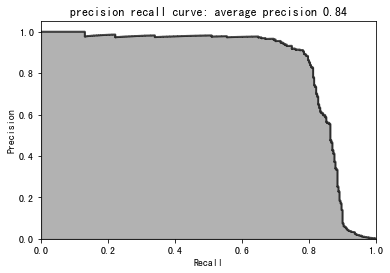

In [177]:
preds = pd.concat([y_train,predictionBasedOnKFolds.loc[:,'prediction']],axis=1)
preds.columns=['truelabel','prediction']

predkfoldxgb = preds.copy()

precision, recall, threshold= precision_recall_curve(preds['truelabel'],preds['prediction'])

average_precision = average_precision_score(preds['truelabel'],preds['prediction'])
plt.title('precision recall curve: average precision {0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.step(recall,precision,lw=2,color='k',alpha=0.7,where='post')
plt.fill_between(recall,precision,color='k',alpha=0.3,step='post')

(0.0, 1.05)

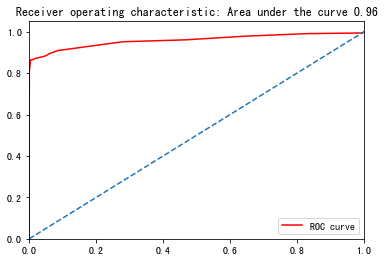

In [93]:
fpr, tpr, threshold = roc_curve(preds['truelabel'],preds['prediction'])

AreaRoc= auc(fpr,tpr)

plt.title('Receiver operating characteristic: Area under the curve {0:.2f}'.format(AreaRoc))
plt.plot(fpr,tpr,color='r',label='ROC curve')
plt.plot([0,1],[0,1],linestyle='--')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1.05])


平均精度是0.76， XGboost 0.82,  隨機森林 0.79，   邏輯回歸0.73

auROC 0.96，   XGboost 0.97，  隨機森林0.93，     邏輯回歸 0.97 ，  

#### 利用test set 評估四個模型

要學會tuning模型我們會需要學著調整超參數。

根據每個模型，我們會訓練好的模型針對測試集預測詐騙的機率。最後再計算logloss，比較真實詐騙標籤計算詐騙機率。


log Loss of Logistic Regression:  0.09674714468476121
log loss of random forests 0.009018284462863804
log loss of xgboost 0.002424374468390823
log loss of gbm 0.002523122137335972


(0.0, 1.05)

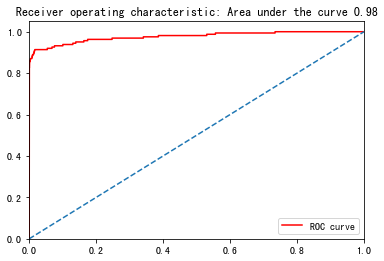

In [114]:
predictionsTestSetLogisticRegression = pd.DataFrame(data=[],index=y_test.index, columns=['prediction'])

predictionsTestSetLogisticRegression.loc[:,'prediction'] = logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = log_loss(y_test, predictionsTestSetLogisticRegression)
print('log Loss of Logistic Regression: ',logLossTestSetLogisticRegression)

predictionsTestSetRandomForests = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = RFC.predict_proba(X_test)[:,1]
loglossTSRF = log_loss(y_test,predictionsTestSetRandomForests)
print('log loss of random forests',loglossTSRF)

predictionTestSetXGBoostgradienboosting = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionTestSetXGBoostgradienboosting.loc[:,'prediction'] =  bst.predict(dtest)
loglosstsxgb = log_loss(y_test,predictionTestSetXGBoostgradienboosting)
print('log loss of xgboost',loglosstsxgb)

predictionTestSetlightGBM = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionTestSetlightGBM.loc[:,'prediction'] = gbm.predict(X_test,num_iteration=gbm.best_iteration)
loglosstsgbm = log_loss(y_test,predictionTestSetlightGBM)
print('log loss of gbm',loglosstsgbm)


書中TEST set的結果為:
邏輯回歸 平均精度:0.73   auROC面積:0.98
隨機森林 平均精度:0.83   auROC面積:0.93
XGBoost 平均精度:0.86   auROC面積:0.97
LightGBM 平均精度:0.87  auROC面積:0.98

看出lightGBM可以抓到超過80%的詐騙交易，並且準度度有將近90%



(0.0, 1.05)

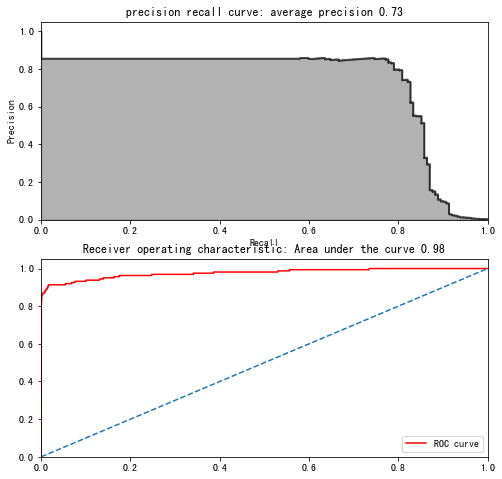

In [167]:
# Logistic regression
preds = pd.concat([y_test,predictionsTestSetLogisticRegression.loc[:,'prediction']],axis=1)
preds.columns=['truelabel','prediction']

predkfoldxgb = preds.copy()

precision, recall, threshold= precision_recall_curve(preds['truelabel'],preds['prediction'])

average_precision = average_precision_score(preds['truelabel'],preds['prediction'])
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('precision recall curve: average precision {0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.step(recall,precision,lw=2,color='k',alpha=0.7,where='post')
plt.fill_between(recall,precision,color='k',alpha=0.3,step='post')


fpr, tpr, threshold = roc_curve(preds['truelabel'],preds['prediction'])

AreaRoc= auc(fpr,tpr)
plt.subplot(212)

plt.title('Receiver operating characteristic: Area under the curve {0:.2f}'.format(AreaRoc))
plt.plot(fpr,tpr,color='r',label='ROC curve')
plt.plot([0,1],[0,1],linestyle='--')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1.05])


(0.0, 1.05)

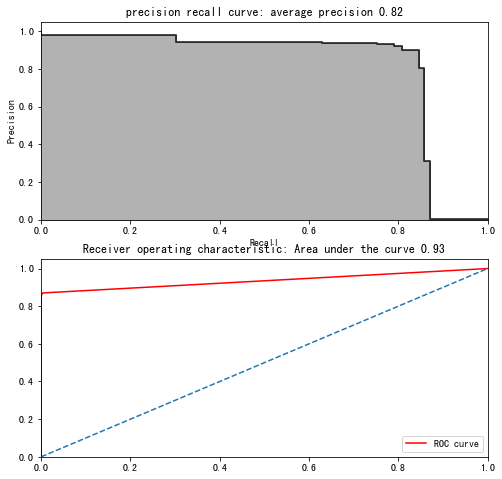

In [131]:
# Random forest
preds = pd.concat([y_test,predictionsTestSetRandomForests.loc[:,'prediction']],axis=1)
preds.columns=['truelabel','prediction']

predkfoldxgb = preds.copy()

precision, recall, threshold= precision_recall_curve(preds['truelabel'],preds['prediction'])

average_precision = average_precision_score(preds['truelabel'],preds['prediction'])
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('precision recall curve: average precision {0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.step(recall,precision,lw=2,color='k',alpha=0.7,where='post')
plt.fill_between(recall,precision,color='k',alpha=0.3,step='post')


fpr, tpr, threshold = roc_curve(preds['truelabel'],preds['prediction'])

AreaRoc= auc(fpr,tpr)
plt.subplot(212)

plt.title('Receiver operating characteristic: Area under the curve {0:.2f}'.format(AreaRoc))
plt.plot(fpr,tpr,color='r',label='ROC curve')
plt.plot([0,1],[0,1],linestyle='--')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1.05])


(0.0, 1.05)

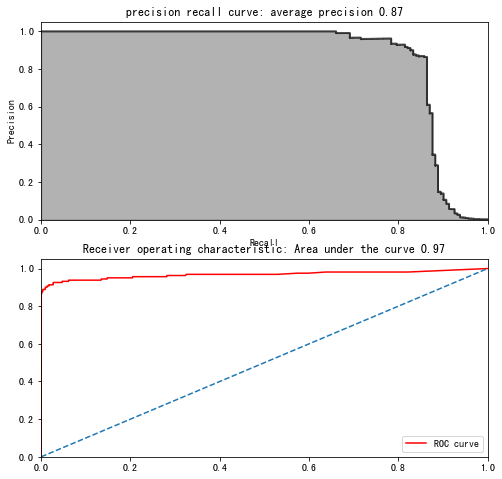

In [132]:
# XGBoost
preds = pd.concat([y_test,predictionTestSetXGBoostgradienboosting.loc[:,'prediction']],axis=1)
preds.columns=['truelabel','prediction']

predkfoldxgb = preds.copy()

precision, recall, threshold= precision_recall_curve(preds['truelabel'],preds['prediction'])

average_precision = average_precision_score(preds['truelabel'],preds['prediction'])
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('precision recall curve: average precision {0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.step(recall,precision,lw=2,color='k',alpha=0.7,where='post')
plt.fill_between(recall,precision,color='k',alpha=0.3,step='post')


fpr, tpr, threshold = roc_curve(preds['truelabel'],preds['prediction'])

AreaRoc= auc(fpr,tpr)
plt.subplot(212)

plt.title('Receiver operating characteristic: Area under the curve {0:.2f}'.format(AreaRoc))
plt.plot(fpr,tpr,color='r',label='ROC curve')
plt.plot([0,1],[0,1],linestyle='--')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1.05])


        truelabel  prediction
67353           0    0.000035
67626           0    0.000020
169699          0    0.003975
217315          0    0.000075
111420          0    0.000035
...           ...         ...
70762           0    0.000037
69843           0    0.000195
191806          0    0.000036
259722          0    0.000039
36616           0    0.000009

[93987 rows x 2 columns]


(0.0, 1.05)

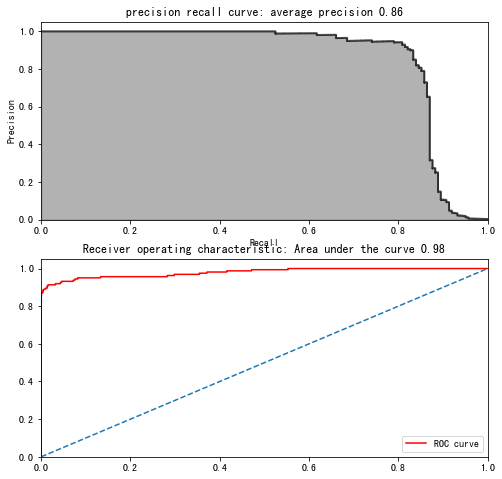

In [156]:
# lightGBM
preds = pd.concat([y_test,predictionTestSetlightGBM.loc[:,'prediction']],axis=1)
preds.columns=['truelabel','prediction']
print(preds)
predkfoldxgb = preds.copy()

precision, recall, threshold= precision_recall_curve(preds['truelabel'],preds['prediction'])

average_precision = average_precision_score(preds['truelabel'],preds['prediction'])
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('precision recall curve: average precision {0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.step(recall,precision,lw=2,color='k',alpha=0.7,where='post')
plt.fill_between(recall,precision,color='k',alpha=0.3,step='post')


fpr, tpr, threshold = roc_curve(preds['truelabel'],preds['prediction'])

AreaRoc= auc(fpr,tpr)
plt.subplot(212)

plt.title('Receiver operating characteristic: Area under the curve {0:.2f}'.format(AreaRoc))
plt.plot(fpr,tpr,color='r',label='ROC curve')
plt.plot([0,1],[0,1],linestyle='--')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1.05])


書中TEST set的結果為:<br/>
邏輯回歸 平均精度:0.73   auROC面積:0.98<br/>
隨機森林 平均精度:0.83   auROC面積:0.93<br/>
XGBoost 平均精度:0.86   auROC面積:0.97<br/>
LightGBM 平均精度:0.87  auROC面積:0.98<br/>


我的TEST set的結果為:<br/>
邏輯回歸 平均精度:0.73   auROC面積:0.98<br/>
隨機森林 平均精度:0.82   auROC面積:0.93<br/>
XGBoost 平均精度:0.87   auROC面積:0.97<br/>
LightGBM 平均精度:0.86  auROC面積:0.98


* 以解決這個問題
由於我的learning_rate 設成0.1，導致模型無法收斂成功

### Ensemble 集成
可以選擇把多個模型集成再一起增加詐騙的偵測率。

通常，如果我們從不同機器學習家族中(比方隨機森林和神經網路)納入類似強度解決方案，這樣的集成可以幫助我們產生有更好結果。
原因:不同的獨立學習方式有不同的優缺點。

但有個很重要的警告。如果獨立的解決方案有很相似的強度，這樣的集成的效果很好。但是如果其中一個方案比另外一個強很多，集成出來的效果會跟最好的獨立解決方案一樣，沒有太大的影響。

同時，獨立解決方案必須是無相關的。若有相關，其中一個的強度會犯映出剩下的，缺點也一樣。

### Stacking
在信用卡問題，lightGBM 和XGBOOST 相較另外兩個模型強。但是這兩個最強的模型是同一個家族的，也就是說強度和缺點有高度相關性。

我們可以使用stacking來決定我們表現是否可以得到改善。使用stacking，我們可以從四個獨立的模型的k fold 交叉驗證且把他們附加到原始訓練集取得預測。
We then train on this original features plus layer one predictions dataset using k-fold cross-validation.

#### 結合第一層預測值和原本訓練集


In [178]:
predictionBasedOnKFoldModels = pd.DataFrame(data=[], index=y_train.index)
predictionBasedOnKFoldModels = predictionBasedOnKFoldModels.join(predictionsTestSetLogisticRegression['prediction'].astype(float),
                                                                how='left').join(predictionsTestSetRandomForests['prediction'].astype(float),how='left',rsuffix='2'
                                                                                ).join(predictionTestSetXGBoostgradienboosting['prediction'].astype(float),how='left',rsuffix='3'
                                                                                      ).join(predictionTestSetlightGBM['prediction'].astype(float),how='left',rsuffix='4')
predictionBasedOnKFoldModels.columns=['predsLR','predsRF','predsXGB','predsLGBM']
X_trainPredictions = X_train.merge(predictionBasedOnKFoldModels,left_index=True, right_index=True)


#### 設定超參數
現在使用lightGBM gradient boosting，四個模型最好的來訓練原本的特徵加上一層預測的資料集。


In [179]:
params_lightGB={
    'task':'train',
    'application':'binary',
    'num_class':1,
    'boosting':'gbdt',
    'objective':'binary',
    'metric':'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves':31,
    'learning_rate':0.01,
    'feature_fraction':1.0,
    'bagging_fraction':1.0,
    'bagging_freq':0,
    'bagging_seed':2018,
    'verbose':-1,
    'num_threads':16
}

#### 訓練模型
同樣使用k-fold交叉驗證，產生詐騙交易的機率

In [180]:
trainingScores=[]
cvScores=[]
predictionBasedOnKFoldEnsemble = pd.DataFrame(data=[], index=y_train.index, columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_trainPredictions.iloc[train_index,:], X_trainPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold,y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold,y_cv_fold, reference = lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000, valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold,gbm.predict(X_train_fold, num_iteration =gbm.best_iteration))
    
    trainingScores.append(loglossTraining)
    
    predictionBasedOnKFoldEnsemble.loc[X_cv_fold.index,'prediction'] = gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration)
    loglossCV = log_loss(y_cv_fold, predictionBasedOnKFoldEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training log loss', loglossTraining)
    print('CV log loss', loglossCV)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[1]	valid_0's binary_logloss: 0.00634115
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00627113
[3]	valid_0's binary_logloss: 0.00620105
[4]	valid_0's binary_logloss: 0.00615078
[5]	valid_0's binary_logloss: 0.00609437
[6]	valid_0's binary_logloss: 0.00605299
[7]	valid_0's binary_logloss: 0.00599903
[8]	valid_0's binary_logloss: 0.00594246
[9]	valid_0's binary_logloss: 0.00588891
[10]	valid_0's binary_logloss: 0.0058368
[11]	valid_0's binary_logloss: 0.00578315
[12]	valid_0's binary_logloss: 0.00573411
[13]	valid_0's binary_logloss: 0.0056854
[14]	valid_0's binary_logloss: 0.0056367
[15]	valid_0's binary_logloss: 0.0055896
[16]	valid_0's binary_logloss: 0.00554671
[17]	valid_0's binary_logloss: 0.00550416
[18]	valid_0's binary_logloss: 0.00546486
[19]	valid_0's binary_logloss: 0.00542391
[20]	valid_0's binary_logloss: 0.005384

[208]	valid_0's binary_logloss: 0.00302187
[209]	valid_0's binary_logloss: 0.00301932
[210]	valid_0's binary_logloss: 0.0030171
[211]	valid_0's binary_logloss: 0.00301496
[212]	valid_0's binary_logloss: 0.00301082
[213]	valid_0's binary_logloss: 0.00300827
[214]	valid_0's binary_logloss: 0.00300651
[215]	valid_0's binary_logloss: 0.00300231
[216]	valid_0's binary_logloss: 0.0029998
[217]	valid_0's binary_logloss: 0.00299842
[218]	valid_0's binary_logloss: 0.00299647
[219]	valid_0's binary_logloss: 0.002994
[220]	valid_0's binary_logloss: 0.0029931
[221]	valid_0's binary_logloss: 0.00298848
[222]	valid_0's binary_logloss: 0.00298761
[223]	valid_0's binary_logloss: 0.00298465
[224]	valid_0's binary_logloss: 0.00298237
[225]	valid_0's binary_logloss: 0.0029812
[226]	valid_0's binary_logloss: 0.00297793
[227]	valid_0's binary_logloss: 0.00297575
[228]	valid_0's binary_logloss: 0.00297505
[229]	valid_0's binary_logloss: 0.00297155
[230]	valid_0's binary_logloss: 0.00296995
[231]	valid_0's b

[403]	valid_0's binary_logloss: 0.00276001
[404]	valid_0's binary_logloss: 0.00275979
[405]	valid_0's binary_logloss: 0.00275914
[406]	valid_0's binary_logloss: 0.00275897
[407]	valid_0's binary_logloss: 0.0027576
[408]	valid_0's binary_logloss: 0.00275782
[409]	valid_0's binary_logloss: 0.00275719
[410]	valid_0's binary_logloss: 0.002757
[411]	valid_0's binary_logloss: 0.00275792
[412]	valid_0's binary_logloss: 0.00275721
[413]	valid_0's binary_logloss: 0.00275599
[414]	valid_0's binary_logloss: 0.00275496
[415]	valid_0's binary_logloss: 0.00275541
[416]	valid_0's binary_logloss: 0.00275495
[417]	valid_0's binary_logloss: 0.00275378
[418]	valid_0's binary_logloss: 0.0027531
[419]	valid_0's binary_logloss: 0.0027519
[420]	valid_0's binary_logloss: 0.00275203
[421]	valid_0's binary_logloss: 0.00274971
[422]	valid_0's binary_logloss: 0.00274849
[423]	valid_0's binary_logloss: 0.00274897
[424]	valid_0's binary_logloss: 0.00274854
[425]	valid_0's binary_logloss: 0.00274791
[426]	valid_0's 

[626]	valid_0's binary_logloss: 0.00268578
[627]	valid_0's binary_logloss: 0.00268558
[628]	valid_0's binary_logloss: 0.00268598
[629]	valid_0's binary_logloss: 0.00268512
[630]	valid_0's binary_logloss: 0.0026849
[631]	valid_0's binary_logloss: 0.00268565
[632]	valid_0's binary_logloss: 0.00268582
[633]	valid_0's binary_logloss: 0.002686
[634]	valid_0's binary_logloss: 0.00268599
[635]	valid_0's binary_logloss: 0.0026856
[636]	valid_0's binary_logloss: 0.0026854
[637]	valid_0's binary_logloss: 0.00268392
[638]	valid_0's binary_logloss: 0.00268308
[639]	valid_0's binary_logloss: 0.00268207
[640]	valid_0's binary_logloss: 0.00268283
[641]	valid_0's binary_logloss: 0.00268327
[642]	valid_0's binary_logloss: 0.00268339
[643]	valid_0's binary_logloss: 0.00268345
[644]	valid_0's binary_logloss: 0.00268325
[645]	valid_0's binary_logloss: 0.0026824
[646]	valid_0's binary_logloss: 0.00268256
[647]	valid_0's binary_logloss: 0.00268112
[648]	valid_0's binary_logloss: 0.0026803
[649]	valid_0's bi

[844]	valid_0's binary_logloss: 0.00264564
[845]	valid_0's binary_logloss: 0.00264646
[846]	valid_0's binary_logloss: 0.00264635
[847]	valid_0's binary_logloss: 0.00264684
[848]	valid_0's binary_logloss: 0.0026459
[849]	valid_0's binary_logloss: 0.00264381
[850]	valid_0's binary_logloss: 0.00264311
[851]	valid_0's binary_logloss: 0.00264313
[852]	valid_0's binary_logloss: 0.00264293
[853]	valid_0's binary_logloss: 0.00264208
[854]	valid_0's binary_logloss: 0.00264261
[855]	valid_0's binary_logloss: 0.00264287
[856]	valid_0's binary_logloss: 0.00264285
[857]	valid_0's binary_logloss: 0.00264331
[858]	valid_0's binary_logloss: 0.00264403
[859]	valid_0's binary_logloss: 0.00264351
[860]	valid_0's binary_logloss: 0.00264401
[861]	valid_0's binary_logloss: 0.00264404
[862]	valid_0's binary_logloss: 0.00264359
[863]	valid_0's binary_logloss: 0.00264372
[864]	valid_0's binary_logloss: 0.00264326
[865]	valid_0's binary_logloss: 0.00264239
[866]	valid_0's binary_logloss: 0.00264238
[867]	valid_

[1036]	valid_0's binary_logloss: 0.00263595
[1037]	valid_0's binary_logloss: 0.00263571
[1038]	valid_0's binary_logloss: 0.00263622
[1039]	valid_0's binary_logloss: 0.00263566
[1040]	valid_0's binary_logloss: 0.00263624
[1041]	valid_0's binary_logloss: 0.00263468
[1042]	valid_0's binary_logloss: 0.00263556
[1043]	valid_0's binary_logloss: 0.00263542
[1044]	valid_0's binary_logloss: 0.00263582
[1045]	valid_0's binary_logloss: 0.00263633
[1046]	valid_0's binary_logloss: 0.00263623
[1047]	valid_0's binary_logloss: 0.00263764
[1048]	valid_0's binary_logloss: 0.0026361
[1049]	valid_0's binary_logloss: 0.00263697
[1050]	valid_0's binary_logloss: 0.00263635
[1051]	valid_0's binary_logloss: 0.0026359
[1052]	valid_0's binary_logloss: 0.0026363
[1053]	valid_0's binary_logloss: 0.0026362
[1054]	valid_0's binary_logloss: 0.00263613
[1055]	valid_0's binary_logloss: 0.002636
[1056]	valid_0's binary_logloss: 0.0026359
[1057]	valid_0's binary_logloss: 0.0026365
[1058]	valid_0's binary_logloss: 0.00263

[1248]	valid_0's binary_logloss: 0.00265299
[1249]	valid_0's binary_logloss: 0.00265174
[1250]	valid_0's binary_logloss: 0.00265166
[1251]	valid_0's binary_logloss: 0.00265207
[1252]	valid_0's binary_logloss: 0.00265212
[1253]	valid_0's binary_logloss: 0.00265365
[1254]	valid_0's binary_logloss: 0.00265399
[1255]	valid_0's binary_logloss: 0.00265432
[1256]	valid_0's binary_logloss: 0.00265471
[1257]	valid_0's binary_logloss: 0.00265476
[1258]	valid_0's binary_logloss: 0.00265645
[1259]	valid_0's binary_logloss: 0.00265673
[1260]	valid_0's binary_logloss: 0.00265661
[1261]	valid_0's binary_logloss: 0.00265831
[1262]	valid_0's binary_logloss: 0.00265871
[1263]	valid_0's binary_logloss: 0.00265899
[1264]	valid_0's binary_logloss: 0.00265849
[1265]	valid_0's binary_logloss: 0.00265849
[1266]	valid_0's binary_logloss: 0.00265892
[1267]	valid_0's binary_logloss: 0.00265911
[1268]	valid_0's binary_logloss: 0.00265949
[1269]	valid_0's binary_logloss: 0.002659
[1270]	valid_0's binary_logloss: 0

[87]	valid_0's binary_logloss: 0.00396598
[88]	valid_0's binary_logloss: 0.00395408
[89]	valid_0's binary_logloss: 0.00394309
[90]	valid_0's binary_logloss: 0.00393296
[91]	valid_0's binary_logloss: 0.00392152
[92]	valid_0's binary_logloss: 0.00391005
[93]	valid_0's binary_logloss: 0.00389891
[94]	valid_0's binary_logloss: 0.00388917
[95]	valid_0's binary_logloss: 0.00387786
[96]	valid_0's binary_logloss: 0.00386703
[97]	valid_0's binary_logloss: 0.0038557
[98]	valid_0's binary_logloss: 0.00384493
[99]	valid_0's binary_logloss: 0.00383397
[100]	valid_0's binary_logloss: 0.00382308
[101]	valid_0's binary_logloss: 0.0038139
[102]	valid_0's binary_logloss: 0.00380197
[103]	valid_0's binary_logloss: 0.00379329
[104]	valid_0's binary_logloss: 0.00378332
[105]	valid_0's binary_logloss: 0.00377319
[106]	valid_0's binary_logloss: 0.00376325
[107]	valid_0's binary_logloss: 0.00375243
[108]	valid_0's binary_logloss: 0.00374276
[109]	valid_0's binary_logloss: 0.00373397
[110]	valid_0's binary_log

[293]	valid_0's binary_logloss: 0.00303383
[294]	valid_0's binary_logloss: 0.00303333
[295]	valid_0's binary_logloss: 0.00303247
[296]	valid_0's binary_logloss: 0.00303173
[297]	valid_0's binary_logloss: 0.00303058
[298]	valid_0's binary_logloss: 0.00303012
[299]	valid_0's binary_logloss: 0.00302948
[300]	valid_0's binary_logloss: 0.00302896
[301]	valid_0's binary_logloss: 0.00302879
[302]	valid_0's binary_logloss: 0.00302834
[303]	valid_0's binary_logloss: 0.00302739
[304]	valid_0's binary_logloss: 0.00302686
[305]	valid_0's binary_logloss: 0.00302627
[306]	valid_0's binary_logloss: 0.00302533
[307]	valid_0's binary_logloss: 0.00302477
[308]	valid_0's binary_logloss: 0.00302438
[309]	valid_0's binary_logloss: 0.00302347
[310]	valid_0's binary_logloss: 0.00302279
[311]	valid_0's binary_logloss: 0.00302223
[312]	valid_0's binary_logloss: 0.00302172
[313]	valid_0's binary_logloss: 0.00302075
[314]	valid_0's binary_logloss: 0.00301999
[315]	valid_0's binary_logloss: 0.0030191
[316]	valid_

[511]	valid_0's binary_logloss: 0.00294693
[512]	valid_0's binary_logloss: 0.00294686
[513]	valid_0's binary_logloss: 0.00294623
[514]	valid_0's binary_logloss: 0.00294479
[515]	valid_0's binary_logloss: 0.00294462
[516]	valid_0's binary_logloss: 0.00294589
[517]	valid_0's binary_logloss: 0.00294384
[518]	valid_0's binary_logloss: 0.00294472
[519]	valid_0's binary_logloss: 0.00294458
[520]	valid_0's binary_logloss: 0.00294538
[521]	valid_0's binary_logloss: 0.00294532
[522]	valid_0's binary_logloss: 0.00294473
[523]	valid_0's binary_logloss: 0.00294274
[524]	valid_0's binary_logloss: 0.00294462
[525]	valid_0's binary_logloss: 0.00294446
[526]	valid_0's binary_logloss: 0.00294396
[527]	valid_0's binary_logloss: 0.00294453
[528]	valid_0's binary_logloss: 0.00294368
[529]	valid_0's binary_logloss: 0.00294362
[530]	valid_0's binary_logloss: 0.00294469
[531]	valid_0's binary_logloss: 0.0029428
[532]	valid_0's binary_logloss: 0.00294248
[533]	valid_0's binary_logloss: 0.0029434
[534]	valid_0

[716]	valid_0's binary_logloss: 0.00292787
[717]	valid_0's binary_logloss: 0.00292751
[718]	valid_0's binary_logloss: 0.00292747
[719]	valid_0's binary_logloss: 0.00292842
[720]	valid_0's binary_logloss: 0.00292795
[721]	valid_0's binary_logloss: 0.00292802
[722]	valid_0's binary_logloss: 0.002928
[723]	valid_0's binary_logloss: 0.00292795
[724]	valid_0's binary_logloss: 0.00292793
[725]	valid_0's binary_logloss: 0.00292889
[726]	valid_0's binary_logloss: 0.00292792
[727]	valid_0's binary_logloss: 0.00292952
[728]	valid_0's binary_logloss: 0.00292951
[729]	valid_0's binary_logloss: 0.00292858
[730]	valid_0's binary_logloss: 0.00292843
[731]	valid_0's binary_logloss: 0.00292841
[732]	valid_0's binary_logloss: 0.00292878
[733]	valid_0's binary_logloss: 0.00293038
[734]	valid_0's binary_logloss: 0.0029311
[735]	valid_0's binary_logloss: 0.00293108
[736]	valid_0's binary_logloss: 0.00293073
[737]	valid_0's binary_logloss: 0.00293093
[738]	valid_0's binary_logloss: 0.00293079
[739]	valid_0'

[42]	valid_0's binary_logloss: 0.00414404
[43]	valid_0's binary_logloss: 0.00411734
[44]	valid_0's binary_logloss: 0.00409126
[45]	valid_0's binary_logloss: 0.00406555
[46]	valid_0's binary_logloss: 0.00404097
[47]	valid_0's binary_logloss: 0.00401392
[48]	valid_0's binary_logloss: 0.00399203
[49]	valid_0's binary_logloss: 0.00396847
[50]	valid_0's binary_logloss: 0.00394394
[51]	valid_0's binary_logloss: 0.00392208
[52]	valid_0's binary_logloss: 0.00390057
[53]	valid_0's binary_logloss: 0.00387786
[54]	valid_0's binary_logloss: 0.00385889
[55]	valid_0's binary_logloss: 0.00383703
[56]	valid_0's binary_logloss: 0.00381659
[57]	valid_0's binary_logloss: 0.00379521
[58]	valid_0's binary_logloss: 0.00377647
[59]	valid_0's binary_logloss: 0.00375697
[60]	valid_0's binary_logloss: 0.00373991
[61]	valid_0's binary_logloss: 0.00371989
[62]	valid_0's binary_logloss: 0.00370186
[63]	valid_0's binary_logloss: 0.00368408
[64]	valid_0's binary_logloss: 0.00366735
[65]	valid_0's binary_logloss: 0.0

[242]	valid_0's binary_logloss: 0.00244806
[243]	valid_0's binary_logloss: 0.00244703
[244]	valid_0's binary_logloss: 0.00244469
[245]	valid_0's binary_logloss: 0.00244177
[246]	valid_0's binary_logloss: 0.00243986
[247]	valid_0's binary_logloss: 0.00243971
[248]	valid_0's binary_logloss: 0.00243818
[249]	valid_0's binary_logloss: 0.00243735
[250]	valid_0's binary_logloss: 0.00243545
[251]	valid_0's binary_logloss: 0.00243253
[252]	valid_0's binary_logloss: 0.00243127
[253]	valid_0's binary_logloss: 0.00243036
[254]	valid_0's binary_logloss: 0.00242879
[255]	valid_0's binary_logloss: 0.00242654
[256]	valid_0's binary_logloss: 0.00242313
[257]	valid_0's binary_logloss: 0.00242312
[258]	valid_0's binary_logloss: 0.00242207
[259]	valid_0's binary_logloss: 0.00241943
[260]	valid_0's binary_logloss: 0.00241859
[261]	valid_0's binary_logloss: 0.00241696
[262]	valid_0's binary_logloss: 0.00241631
[263]	valid_0's binary_logloss: 0.00241579
[264]	valid_0's binary_logloss: 0.00241501
[265]	valid

[454]	valid_0's binary_logloss: 0.00229738
[455]	valid_0's binary_logloss: 0.00229744
[456]	valid_0's binary_logloss: 0.00229677
[457]	valid_0's binary_logloss: 0.0022961
[458]	valid_0's binary_logloss: 0.00229523
[459]	valid_0's binary_logloss: 0.00229436
[460]	valid_0's binary_logloss: 0.0022938
[461]	valid_0's binary_logloss: 0.00229296
[462]	valid_0's binary_logloss: 0.00229212
[463]	valid_0's binary_logloss: 0.0022915
[464]	valid_0's binary_logloss: 0.00229027
[465]	valid_0's binary_logloss: 0.00229007
[466]	valid_0's binary_logloss: 0.00228925
[467]	valid_0's binary_logloss: 0.00228818
[468]	valid_0's binary_logloss: 0.00228737
[469]	valid_0's binary_logloss: 0.00228683
[470]	valid_0's binary_logloss: 0.00228727
[471]	valid_0's binary_logloss: 0.00228707
[472]	valid_0's binary_logloss: 0.00228673
[473]	valid_0's binary_logloss: 0.00228654
[474]	valid_0's binary_logloss: 0.00228537
[475]	valid_0's binary_logloss: 0.00228525
[476]	valid_0's binary_logloss: 0.00228512
[477]	valid_0'

[653]	valid_0's binary_logloss: 0.0022366
[654]	valid_0's binary_logloss: 0.00223554
[655]	valid_0's binary_logloss: 0.00223601
[656]	valid_0's binary_logloss: 0.00223585
[657]	valid_0's binary_logloss: 0.0022356
[658]	valid_0's binary_logloss: 0.00223612
[659]	valid_0's binary_logloss: 0.00223612
[660]	valid_0's binary_logloss: 0.0022362
[661]	valid_0's binary_logloss: 0.00223651
[662]	valid_0's binary_logloss: 0.0022371
[663]	valid_0's binary_logloss: 0.00223828
[664]	valid_0's binary_logloss: 0.00223844
[665]	valid_0's binary_logloss: 0.00223844
[666]	valid_0's binary_logloss: 0.00223789
[667]	valid_0's binary_logloss: 0.00223874
[668]	valid_0's binary_logloss: 0.00223879
[669]	valid_0's binary_logloss: 0.00223897
[670]	valid_0's binary_logloss: 0.00223911
[671]	valid_0's binary_logloss: 0.00223913
[672]	valid_0's binary_logloss: 0.00223817
[673]	valid_0's binary_logloss: 0.00223861
[674]	valid_0's binary_logloss: 0.00223932
[675]	valid_0's binary_logloss: 0.00223939
[676]	valid_0's

[865]	valid_0's binary_logloss: 0.00223984
[866]	valid_0's binary_logloss: 0.00223878
[867]	valid_0's binary_logloss: 0.00223833
[868]	valid_0's binary_logloss: 0.00223889
[869]	valid_0's binary_logloss: 0.00223784
[870]	valid_0's binary_logloss: 0.00223818
[871]	valid_0's binary_logloss: 0.00223778
[872]	valid_0's binary_logloss: 0.00223774
[873]	valid_0's binary_logloss: 0.00223849
[874]	valid_0's binary_logloss: 0.00223818
[875]	valid_0's binary_logloss: 0.00223855
[876]	valid_0's binary_logloss: 0.00223782
[877]	valid_0's binary_logloss: 0.00223793
[878]	valid_0's binary_logloss: 0.00223863
[879]	valid_0's binary_logloss: 0.00223809
[880]	valid_0's binary_logloss: 0.00223807
[881]	valid_0's binary_logloss: 0.00223805
[882]	valid_0's binary_logloss: 0.00223832
[883]	valid_0's binary_logloss: 0.00223752
[884]	valid_0's binary_logloss: 0.00223788
[885]	valid_0's binary_logloss: 0.00223762
[886]	valid_0's binary_logloss: 0.00223797
[887]	valid_0's binary_logloss: 0.00223814
[888]	valid

[92]	valid_0's binary_logloss: 0.00365158
[93]	valid_0's binary_logloss: 0.00363906
[94]	valid_0's binary_logloss: 0.00362726
[95]	valid_0's binary_logloss: 0.00361625
[96]	valid_0's binary_logloss: 0.00360559
[97]	valid_0's binary_logloss: 0.00359477
[98]	valid_0's binary_logloss: 0.00358441
[99]	valid_0's binary_logloss: 0.0035737
[100]	valid_0's binary_logloss: 0.00356305
[101]	valid_0's binary_logloss: 0.00355205
[102]	valid_0's binary_logloss: 0.00354168
[103]	valid_0's binary_logloss: 0.00353134
[104]	valid_0's binary_logloss: 0.00352072
[105]	valid_0's binary_logloss: 0.00351027
[106]	valid_0's binary_logloss: 0.00350009
[107]	valid_0's binary_logloss: 0.00348999
[108]	valid_0's binary_logloss: 0.00348036
[109]	valid_0's binary_logloss: 0.00347115
[110]	valid_0's binary_logloss: 0.00346198
[111]	valid_0's binary_logloss: 0.00345318
[112]	valid_0's binary_logloss: 0.00344331
[113]	valid_0's binary_logloss: 0.00343438
[114]	valid_0's binary_logloss: 0.00342549
[115]	valid_0's bina

[294]	valid_0's binary_logloss: 0.0027659
[295]	valid_0's binary_logloss: 0.00276426
[296]	valid_0's binary_logloss: 0.00276354
[297]	valid_0's binary_logloss: 0.00276279
[298]	valid_0's binary_logloss: 0.00276085
[299]	valid_0's binary_logloss: 0.00276079
[300]	valid_0's binary_logloss: 0.0027602
[301]	valid_0's binary_logloss: 0.00275997
[302]	valid_0's binary_logloss: 0.00275926
[303]	valid_0's binary_logloss: 0.00275741
[304]	valid_0's binary_logloss: 0.00275741
[305]	valid_0's binary_logloss: 0.00275742
[306]	valid_0's binary_logloss: 0.00275693
[307]	valid_0's binary_logloss: 0.00275546
[308]	valid_0's binary_logloss: 0.00275478
[309]	valid_0's binary_logloss: 0.00275432
[310]	valid_0's binary_logloss: 0.00275377
[311]	valid_0's binary_logloss: 0.0027522
[312]	valid_0's binary_logloss: 0.00275176
[313]	valid_0's binary_logloss: 0.00275063
[314]	valid_0's binary_logloss: 0.00275023
[315]	valid_0's binary_logloss: 0.0027488
[316]	valid_0's binary_logloss: 0.00274832
[317]	valid_0's

[494]	valid_0's binary_logloss: 0.0026837
[495]	valid_0's binary_logloss: 0.00268296
[496]	valid_0's binary_logloss: 0.00268241
[497]	valid_0's binary_logloss: 0.0026825
[498]	valid_0's binary_logloss: 0.00268165
[499]	valid_0's binary_logloss: 0.0026813
[500]	valid_0's binary_logloss: 0.00268123
[501]	valid_0's binary_logloss: 0.00268141
[502]	valid_0's binary_logloss: 0.00268029
[503]	valid_0's binary_logloss: 0.00268109
[504]	valid_0's binary_logloss: 0.00268049
[505]	valid_0's binary_logloss: 0.00268027
[506]	valid_0's binary_logloss: 0.00268038
[507]	valid_0's binary_logloss: 0.00268008
[508]	valid_0's binary_logloss: 0.00267958
[509]	valid_0's binary_logloss: 0.00267848
[510]	valid_0's binary_logloss: 0.00267758
[511]	valid_0's binary_logloss: 0.00267776
[512]	valid_0's binary_logloss: 0.00267803
[513]	valid_0's binary_logloss: 0.00267855
[514]	valid_0's binary_logloss: 0.00267685
[515]	valid_0's binary_logloss: 0.00267712
[516]	valid_0's binary_logloss: 0.00267726
[517]	valid_0'

[702]	valid_0's binary_logloss: 0.00265328
[703]	valid_0's binary_logloss: 0.00265371
[704]	valid_0's binary_logloss: 0.00265421
[705]	valid_0's binary_logloss: 0.00265435
[706]	valid_0's binary_logloss: 0.00265458
[707]	valid_0's binary_logloss: 0.00265464
[708]	valid_0's binary_logloss: 0.00265379
[709]	valid_0's binary_logloss: 0.00265368
[710]	valid_0's binary_logloss: 0.00265441
[711]	valid_0's binary_logloss: 0.00265453
[712]	valid_0's binary_logloss: 0.00265543
[713]	valid_0's binary_logloss: 0.00265492
[714]	valid_0's binary_logloss: 0.00265531
[715]	valid_0's binary_logloss: 0.00265453
[716]	valid_0's binary_logloss: 0.00265492
[717]	valid_0's binary_logloss: 0.00265433
[718]	valid_0's binary_logloss: 0.00265474
[719]	valid_0's binary_logloss: 0.00265301
[720]	valid_0's binary_logloss: 0.00265257
[721]	valid_0's binary_logloss: 0.00265302
[722]	valid_0's binary_logloss: 0.00265247
[723]	valid_0's binary_logloss: 0.00265282
[724]	valid_0's binary_logloss: 0.00265201
[725]	valid

[904]	valid_0's binary_logloss: 0.00267416
[905]	valid_0's binary_logloss: 0.00267449
[906]	valid_0's binary_logloss: 0.00267432
[907]	valid_0's binary_logloss: 0.00267354
[908]	valid_0's binary_logloss: 0.00267312
[909]	valid_0's binary_logloss: 0.00267297
[910]	valid_0's binary_logloss: 0.00267393
[911]	valid_0's binary_logloss: 0.00267399
[912]	valid_0's binary_logloss: 0.00267379
[913]	valid_0's binary_logloss: 0.0026756
[914]	valid_0's binary_logloss: 0.00267511
[915]	valid_0's binary_logloss: 0.00267496
[916]	valid_0's binary_logloss: 0.00267481
[917]	valid_0's binary_logloss: 0.00267465
[918]	valid_0's binary_logloss: 0.00267557
[919]	valid_0's binary_logloss: 0.00267534
[920]	valid_0's binary_logloss: 0.00267527
[921]	valid_0's binary_logloss: 0.00267608
[922]	valid_0's binary_logloss: 0.00267603
[923]	valid_0's binary_logloss: 0.00267695
[924]	valid_0's binary_logloss: 0.00267667
[925]	valid_0's binary_logloss: 0.00267609
[926]	valid_0's binary_logloss: 0.00267605
[927]	valid_

[83]	valid_0's binary_logloss: 0.00451129
[84]	valid_0's binary_logloss: 0.00449906
[85]	valid_0's binary_logloss: 0.00448954
[86]	valid_0's binary_logloss: 0.00447629
[87]	valid_0's binary_logloss: 0.0044654
[88]	valid_0's binary_logloss: 0.0044548
[89]	valid_0's binary_logloss: 0.00444455
[90]	valid_0's binary_logloss: 0.00443421
[91]	valid_0's binary_logloss: 0.00442408
[92]	valid_0's binary_logloss: 0.00441168
[93]	valid_0's binary_logloss: 0.00440244
[94]	valid_0's binary_logloss: 0.00439206
[95]	valid_0's binary_logloss: 0.00438362
[96]	valid_0's binary_logloss: 0.0043707
[97]	valid_0's binary_logloss: 0.00436005
[98]	valid_0's binary_logloss: 0.00434788
[99]	valid_0's binary_logloss: 0.00433991
[100]	valid_0's binary_logloss: 0.00432837
[101]	valid_0's binary_logloss: 0.00431903
[102]	valid_0's binary_logloss: 0.00431087
[103]	valid_0's binary_logloss: 0.00430264
[104]	valid_0's binary_logloss: 0.00429316
[105]	valid_0's binary_logloss: 0.00428595
[106]	valid_0's binary_logloss:

[294]	valid_0's binary_logloss: 0.00370051
[295]	valid_0's binary_logloss: 0.00369884
[296]	valid_0's binary_logloss: 0.00369136
[297]	valid_0's binary_logloss: 0.00369251
[298]	valid_0's binary_logloss: 0.00369086
[299]	valid_0's binary_logloss: 0.00368923
[300]	valid_0's binary_logloss: 0.0036877
[301]	valid_0's binary_logloss: 0.00368716
[302]	valid_0's binary_logloss: 0.00368752
[303]	valid_0's binary_logloss: 0.0036875
[304]	valid_0's binary_logloss: 0.00368664
[305]	valid_0's binary_logloss: 0.00368593
[306]	valid_0's binary_logloss: 0.00368472
[307]	valid_0's binary_logloss: 0.00368353
[308]	valid_0's binary_logloss: 0.00368234
[309]	valid_0's binary_logloss: 0.00368171
[310]	valid_0's binary_logloss: 0.00367983
[311]	valid_0's binary_logloss: 0.00367737
[312]	valid_0's binary_logloss: 0.0036766
[313]	valid_0's binary_logloss: 0.00367575
[314]	valid_0's binary_logloss: 0.00367482
[315]	valid_0's binary_logloss: 0.00367456
[316]	valid_0's binary_logloss: 0.0036734
[317]	valid_0's

[497]	valid_0's binary_logloss: 0.0036192
[498]	valid_0's binary_logloss: 0.003619
[499]	valid_0's binary_logloss: 0.00361894
[500]	valid_0's binary_logloss: 0.00361821
[501]	valid_0's binary_logloss: 0.00361804
[502]	valid_0's binary_logloss: 0.00361798
[503]	valid_0's binary_logloss: 0.00361776
[504]	valid_0's binary_logloss: 0.00361829
[505]	valid_0's binary_logloss: 0.00361814
[506]	valid_0's binary_logloss: 0.00361856
[507]	valid_0's binary_logloss: 0.00361831
[508]	valid_0's binary_logloss: 0.0036175
[509]	valid_0's binary_logloss: 0.00361792
[510]	valid_0's binary_logloss: 0.00361625
[511]	valid_0's binary_logloss: 0.00361602
[512]	valid_0's binary_logloss: 0.00361592
[513]	valid_0's binary_logloss: 0.00361462
[514]	valid_0's binary_logloss: 0.00361517
[515]	valid_0's binary_logloss: 0.00361545
[516]	valid_0's binary_logloss: 0.0036161
[517]	valid_0's binary_logloss: 0.00361509
[518]	valid_0's binary_logloss: 0.00361487
[519]	valid_0's binary_logloss: 0.00361475
[520]	valid_0's 

[715]	valid_0's binary_logloss: 0.00361359
[716]	valid_0's binary_logloss: 0.00361292
[717]	valid_0's binary_logloss: 0.00361395
[718]	valid_0's binary_logloss: 0.00361386
[719]	valid_0's binary_logloss: 0.00361445
[720]	valid_0's binary_logloss: 0.00361462
[721]	valid_0's binary_logloss: 0.00361542
[722]	valid_0's binary_logloss: 0.00361525
[723]	valid_0's binary_logloss: 0.00361568
[724]	valid_0's binary_logloss: 0.0036156
[725]	valid_0's binary_logloss: 0.00361582
[726]	valid_0's binary_logloss: 0.00361627
[727]	valid_0's binary_logloss: 0.00361544
[728]	valid_0's binary_logloss: 0.00361602
[729]	valid_0's binary_logloss: 0.00361681
[730]	valid_0's binary_logloss: 0.00361691
[731]	valid_0's binary_logloss: 0.00361709
[732]	valid_0's binary_logloss: 0.0036162
[733]	valid_0's binary_logloss: 0.0036164
[734]	valid_0's binary_logloss: 0.00361666
[735]	valid_0's binary_logloss: 0.00361668
[736]	valid_0's binary_logloss: 0.00361742
[737]	valid_0's binary_logloss: 0.00361685
[738]	valid_0'

In [181]:
loglossEnsemble = log_loss(y_train,predictionBasedOnKFoldEnsemble.loc[:,'prediction'] )
print('Ensemble log loss: ', loglossEnsemble)

Ensemble log loss:  0.00280873207026739


#### 評估結果
由下圖可以看到，並沒有顯著的改善。集成過後的log loss和獨立提度提升的log loss雷同。因為最好的獨立解決方案是來自相同家族的。

In [184]:
print('Feature importances:' , list(gbm.feature_importance()))

Feature importances: [259, 336, 82, 290, 717, 118, 159, 456, 339, 131, 666, 169, 613, 325, 719, 154, 353, 297, 125, 365, 169, 194, 280, 186, 289, 383, 369, 166, 142, 588, 0, 0, 0, 0]


(0.0, 1.05)

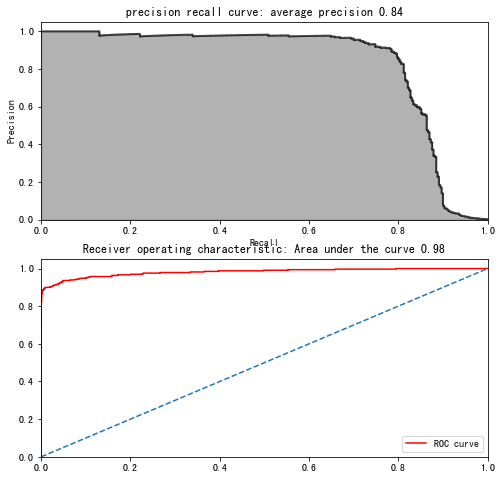

In [182]:
# lightGBM
preds = pd.concat([y_train,predictionBasedOnKFoldEnsemble.loc[:,'prediction']],axis=1)
preds.columns=['truelabel','prediction']
# print(preds)
predkfoldxgb = preds.copy()

precision, recall, threshold= precision_recall_curve(preds['truelabel'],preds['prediction'])

average_precision = average_precision_score(preds['truelabel'],preds['prediction'])
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('precision recall curve: average precision {0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.step(recall,precision,lw=2,color='k',alpha=0.7,where='post')
plt.fill_between(recall,precision,color='k',alpha=0.3,step='post')


fpr, tpr, threshold = roc_curve(preds['truelabel'],preds['prediction'])

AreaRoc= auc(fpr,tpr)
plt.subplot(212)

plt.title('Receiver operating characteristic: Area under the curve {0:.2f}'.format(AreaRoc))
plt.plot(fpr,tpr,color='r',label='ROC curve')
plt.plot([0,1],[0,1],linestyle='--')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1.05])


### 最後模型選擇
因為集成沒有改善表現，我們偏向選擇使用獨立LightGBM梯度提升模型。

在我們創建新的pipeline收集新的交易之前。讓我們先使用測試集視覺化我們模型如何有善的分開詐騙交易和正常交易。



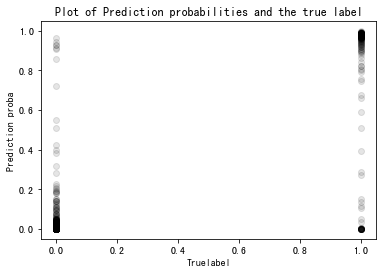

In [194]:
scatterData = predictionTestSetlightGBM.join(y_test,how='left')

scatterData.columns = ['Prediction proba','Truelabel']

ax = sns.regplot(x='Truelabel',y='Prediction proba',data = scatterData,color='k',
                fit_reg=False,scatter_kws={'alpha':0.1}).set_title('Plot of Prediction probabilities and the true label')

In [199]:
scatterData

,Prediction proba,Truelabel
67353,0.000035,0
67626,0.000020,0
169699,0.003975,0
217315,0.000075,0
111420,0.000035,0
...,...,...
70762,0.000037,0
69843,0.000195,0
191806,0.000036,0
259722,0.000039,0


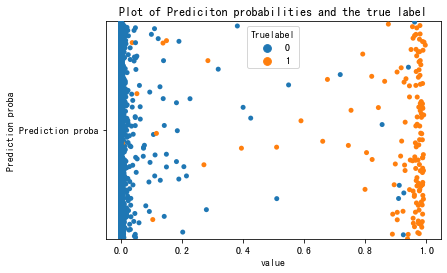

In [206]:
scatterDataMelted = pd.melt(scatterData, 'Truelabel', var_name = 'Prediction proba')
scatterDataMelted

ax = sns.stripplot(x='value',y='Prediction proba',data=scatterDataMelted,hue='Truelabel',jitter=0.5).set_title('Plot of Prediciton probabilities and the true label')

上圖，在X軸顯示預測的機率。

### 產生pipeline
現在我們已經選擇好模型，可以開始設計能夠針對新進資料(載入資料、擴大特徵、產生使用訓練好的lightGBm模型的預測)實施三個簡單步驟pipeline
#### 針對新資料的載入

In [207]:
# 1.import載入新資料到名'newdata'的dataframe中
# 2. scale data將資料標準化
# newData.loc[",featuresToScale"] = sX.transform(newData[featuresToScale])
# 3.用lightGBM預測
# gbm.predict(newData,num_iteration=gbm.best_iteration)


一旦預測值產生完畢，分析師可以針對高預測詐騙機率的案例形成一個列表。

如果目標是自動化，分析師可以利用系統在上述的threshold中自動拒絕預測出高機率為詐騙交易

<h4>這樣的解決方案會必須要重新練一旦詐騙的pattern有改變。同時我們需要從不同的家族中找到機器學習演算法，效果跟梯度提升一樣好，以提升我們詐騙預測的效果。
    
最後，解釋能力在真實世界是很重要的，因為信用卡資料集的特徵是已經使用過PCA處理過了，我們沒辦法單純的解釋為甚麼特定的交易會被認定是詐騙。
    
如果要更詳細的解釋結果，我們需要取得PCA之前的特徵，才能做到。

</h4>
